# <span style="color:#C71585">CLASSIFICATION PREDICTION MODEL: BANK MARKETING CAMPAIGN</span>


![cover.jpg](https://i.ytimg.com/vi/ORUX1lHbOa8/maxresdefault.jpg)

# <span style="color:#C71585"> EXECUTIVE SUMMARY</span>

At Beast Bank, we're always looking to the future and finding innovative ways to stay ahead in the financial world. One such product we offer is time deposits, where customers deposit a fixed amount of money for a set period and, in return, receive a fixed interest rate. But in today’s competitive market, it’s not just about having great products—it’s about attracting and retaining customers. That’s where our dynamic marketing campaigns come into play. Our business development division is on a mission to supercharge these campaigns with engaging promotions, product education, and stronger customer relationships.

Currently, our marketing division has been using a conventional approach to identify potential customers. While this has served us well, Beast Bank is on the lookout for a more effective method to boost profitability by targeting the right potential customers. The dataset from our past marketing campaigns, rich with information like age, job type, balance, home ownership, debt, communication type, last contact month, number of contacts, and campaign outcomes, provides a goldmine of insights. We aim to harness this data to develop a more accurate machine learning model, surpassing the traditional methods.

As a data scientist at Beast Bank, I embarked on a journey of data preparation and selected the Logistic Regression model to predict customers' likelihood to make a deposit. After rigorous hyperparameter tuning and threshold adjustments, our model achieved an impressive F1-score of 0.66, outperforming the previous conventional approach which had an F1-score of 0.64. Key predictors included the success of previous marketing campaigns, home and loan ownership, time since the last contact, account balance, and customer status as students or retirees. With this model, Beast Bank is poised to enhance the efficiency and effectiveness of our marketing campaigns, allocating resources more accurately, and ultimately, boosting our deposit income.

# <span style="color:#C71585">1. Business Problem Understanding</span>

> ## Context

In today’s diverse financial market, time deposits remain a popular choice among customers. These deposits involve customers putting a certain amount of money into the bank for a fixed period, earning a steady interest rate in return. However, to stay competitive and avoid losing customers, banks need to continuously innovate in their marketing strategies.

> ## Problem Statement

The business development division at Beast Bank is committed to enhancing the performance of our marketing campaigns. These campaigns aim to attract new customers through engaging promotions, product education, and building stronger relationships. Currently, our marketing division uses a conventional approach, defining clear criteria to identify potential customers. While effective, we believe there’s a better way to increase profitability by targeting the right customers more accurately.

> ## Goals

Beast Bank provides a rich dataset from previous marketing campaigns, which we will use to predict the audience most likely to make a deposit at Beast Bank. This dataset includes features such as age, job type, balance, home ownership, debt, communication type, last contact month, number of contacts, and campaign outcomes.

The goal is to develop a machine learning model that outperforms the traditional approach, enhancing the precision of our marketing efforts.



> ## Stakeholder
- Chief Marketing Officer (CMO): Responsible for the overall marketing strategy and its alignment with business objectives.
- Head of Business Development: Focuses on growth opportunities and strategic partnerships to enhance the bank’s offerings.


> ## Analytic Approach

As a data scientist at Beast Bank, my approach involves thorough data preparation and selecting the optimal classification model to predict deposits. We tested various models including logistic regression, decision tree classifier, and gradient boost classifier, ultimately finding that logistic regression delivered the best results with an F1-score of 0.66.

> ## Metric Evaluation

The primary metric for evaluation is the F1-score, a measure of a model’s accuracy that combines both precision and recall:

Precision: The accuracy of the model in predicting actual depositors.
Recall: The ability of the model to identify true depositors among the customer base.

With these metrics, Beast Bank aims to refine our marketing campaigns, ensuring we allocate resources efficiently and engage with customers who are most likely to make a deposit, thus driving higher profitability and better customer satisfaction.

# <span style="color:#C71585"> 2. Data Understanding</span>

<img src="https://media.licdn.com/dms/image/C4E12AQH5gzOFYWMqSQ/article-cover_image-shrink_720_1280/0/1649706269774?e=2147483647&v=beta&t=1nMFFPPkL07GmKz3R8ub_Oni__YcYsVlzMQUUtrWDY0" alt="Cover Image" style="width:50%; height:auto;">


#### **Features Information**

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix

In [2]:
#open data
df = pd.read_csv("/Users/hizkiasimaremare/Documents/PURWADHIKA/CAPSTONE 3/data_bank_marketing_campaign.csv")
display(df.head(),df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7813 entries, 0 to 7812
Data columns (total 11 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   age       7813 non-null   int64 
 1   job       7813 non-null   object
 2   balance   7813 non-null   int64 
 3   housing   7813 non-null   object
 4   loan      7813 non-null   object
 5   contact   7813 non-null   object
 6   month     7813 non-null   object
 7   campaign  7813 non-null   int64 
 8   pdays     7813 non-null   int64 
 9   poutcome  7813 non-null   object
 10  deposit   7813 non-null   object
dtypes: int64(4), object(7)
memory usage: 671.6+ KB


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,yes
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,yes
2,51,admin.,3025,no,no,cellular,may,1,352,other,yes
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,no
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,no


None

The provided dataset contains 7813 entries. We will divide this data into two parts:

1. 80% of the data will be used as the training set to train the model.
2. 20% of the data will be used as the test set to evaluate the model.

Here are the columns available in the dataset:


| **Column Category**       | **Column**  | **Description**                                           |
|--------------------------|------------|---------------------------------------------------------|
| **Customer Profile**     | age       | Age of the client                                        |
|                          | job  | Job type of the client                             |
|                          | balance      | 	Account balance                                         |
|                          | housing  | Whether the client has a housing loan               |
|                          | loan   | 	Whether the client has a personal loan               |
| **Marketing Data**       | contact     | Type of communication                               |
|                          | month      | Last contact month of the year                       |
|                          | campaign   | Number of contacts performed during this campaign for the client |
|                          | pdays      | Number of days since the client was last contacted from a previous campaign |
|                          | poutcome | Outcome of the previous marketing campaign             |
|                          | deposit    | Whether the client subscribed to a deposit         |

Notes:
1. The balance feature can have negative values due to administrative fees that can reduce the account balance to negative if the current balance is zero (0).
2. The pdays feature can have a value of -1, indicating that the prospective customer has never been contacted in a previous campaign..
3. The poutcome feature has four possible values:
- Success: The previous campaign succeeded in getting the prospective customer to use the product after being contacted.
- Failure: The previous campaign did not succeed in getting the prospective customer to use the product after being contacted.
- Other: The prospective customer did not answer when contacted.
- Unknown: The prospective customer has never been contacted before.

We will use the deposit column as the label to be predicted, while the other columns will be used as features to predict this label.

## Check Imbalance 

/var/folders/st/gw4jj341603__cgq15n27q4h0000gn/T/ipykernel_18368/1356223646.py:10: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(y=df['deposit'],
/var/folders/st/gw4jj341603__cgq15n27q4h0000gn/T/ipykernel_18368/1356223646.py:17: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  plt.text(value, index, f'{value} ({percentage[index]:.2f}%)', va='center')


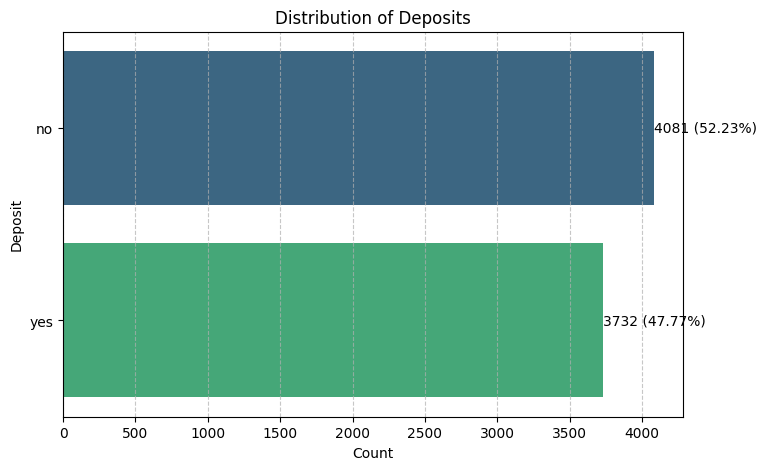

In [3]:
import matplotlib.pyplot as plt
import seaborn as sns

# Calculate value counts and percentage
value_counts = df['deposit'].value_counts()
percentage = (value_counts / len(df)) * 100

# Plot
plt.figure(figsize=(8, 5))
sns.countplot(y=df['deposit'],
              data=df,
              order=value_counts.sort_values(ascending=False).index,
              palette='viridis')

# Add annotations
for index, value in enumerate(value_counts):
    plt.text(value, index, f'{value} ({percentage[index]:.2f}%)', va='center')

# Customize the plot
plt.xlabel('Count')
plt.ylabel('Deposit')
plt.title('Distribution of Deposits')
plt.grid(axis='x', linestyle='--', alpha=0.7)

# Show plot
plt.show()


The data is fairly balanced between prospective customers who will open and those who will not open a term deposit. The difference is only about 5%.

## Cardinality Categoric Features

In [4]:
kategorik = df.select_dtypes(include = 'object')
kategorik.head()

,job,housing,loan,contact,month,poutcome,deposit
0,admin.,no,no,cellular,jun,unknown,yes
1,self-employed,yes,yes,cellular,apr,unknown,yes
2,admin.,no,no,cellular,may,other,yes
3,services,yes,no,cellular,may,unknown,no
4,housemaid,yes,no,telephone,nov,unknown,no


Text(0.5, 1.0, 'Unique Values')

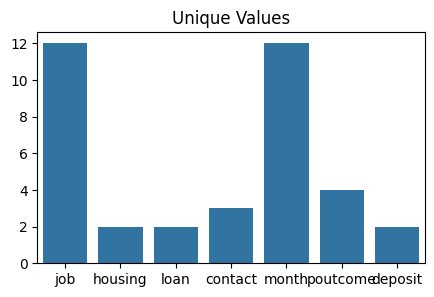

In [5]:
# Visualisation with Seaborn

plt.figure(figsize = (5,3))
sns.barplot(x = kategorik.nunique().index, y = kategorik.nunique().values)
plt.xlabel('')
plt.title('Unique Values')

In [6]:
kategorik.describe(include = 'object')

,job,housing,loan,contact,month,poutcome,deposit
count,7813,7813,7813,7813,7813,7813,7813
unique,12,2,2,3,12,4,2
top,management,no,no,cellular,may,unknown,no
freq,1792,4140,6789,5628,1976,5819,4081


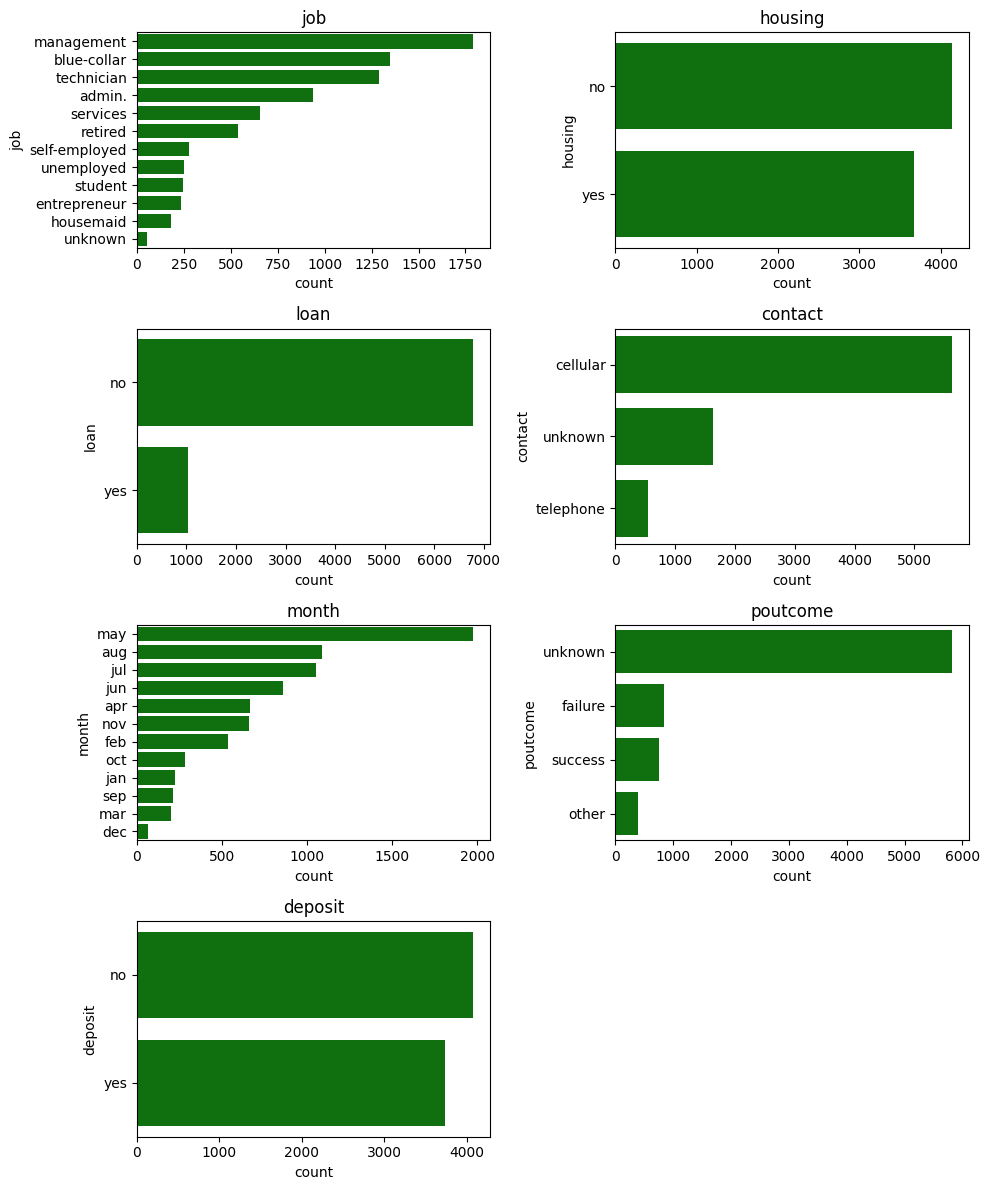

In [7]:
count = 0
fig = plt.figure(figsize=(10,12))
for kolom in df.select_dtypes(exclude='number').columns:
    count += 1
    plt.subplot(4,2,count)
    sns.countplot(y = kolom, 
                  data = df.select_dtypes(exclude='number'), 
                  order = df.select_dtypes(exclude='number')[kolom].value_counts().sort_values(ascending = False).index, 
                  color= 'green')
    plt.title(kolom, fontsize=12)
    fig.tight_layout()

plt.show()

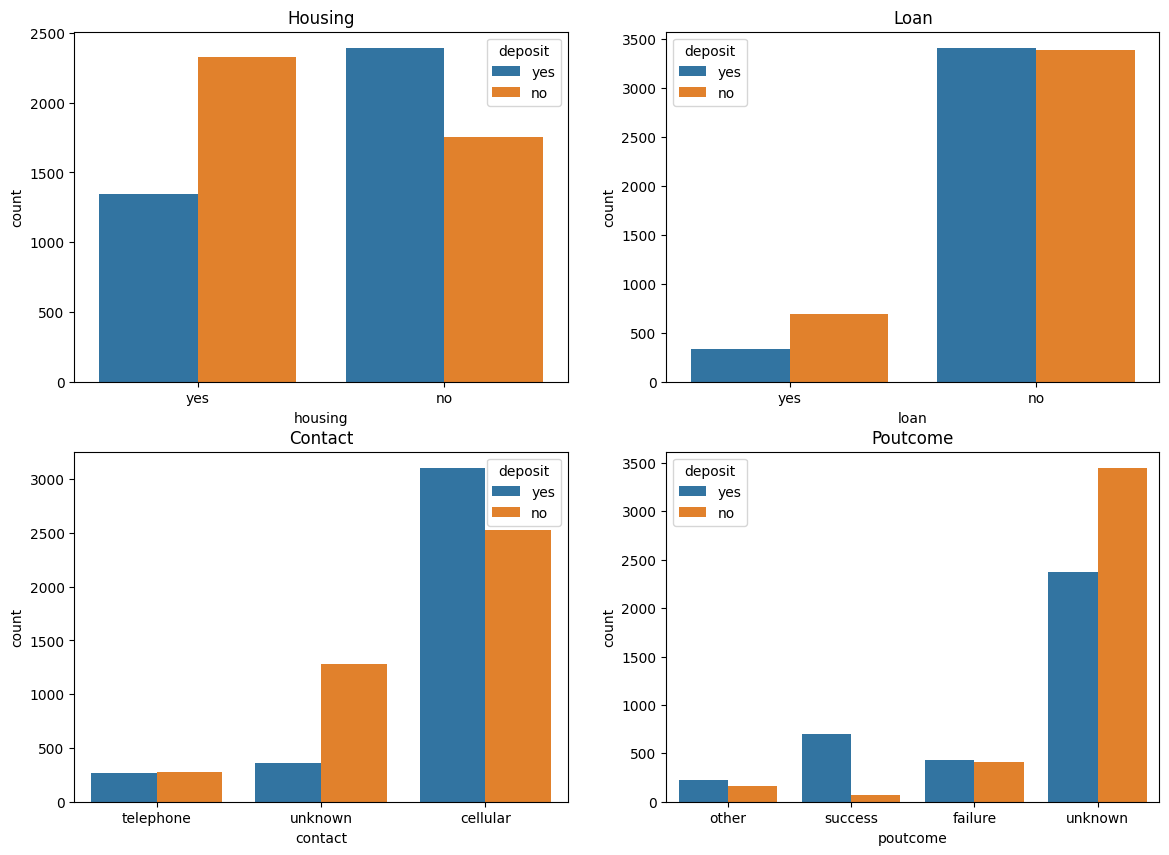

In [8]:
# Visualization of counts based on several categorical features

plt.figure(figsize=(14,10))

plt.subplot(221)
sns.countplot(x = df['housing'], data = df, order = df['housing'].value_counts().sort_values(ascending =    True).index, hue= 'deposit')
plt.title('Housing',fontsize=12)

plt.subplot(222)
sns.countplot(x = df['loan'], data = df, order = df['loan'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Loan',fontsize=12)

plt.subplot(223)
sns.countplot(x = df['contact'], data = df, order = df['contact'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Contact',fontsize=12)

plt.subplot(224)
sns.countplot(x = df['poutcome'], data = df, order = df['poutcome'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Poutcome',fontsize=12)

plt.show()

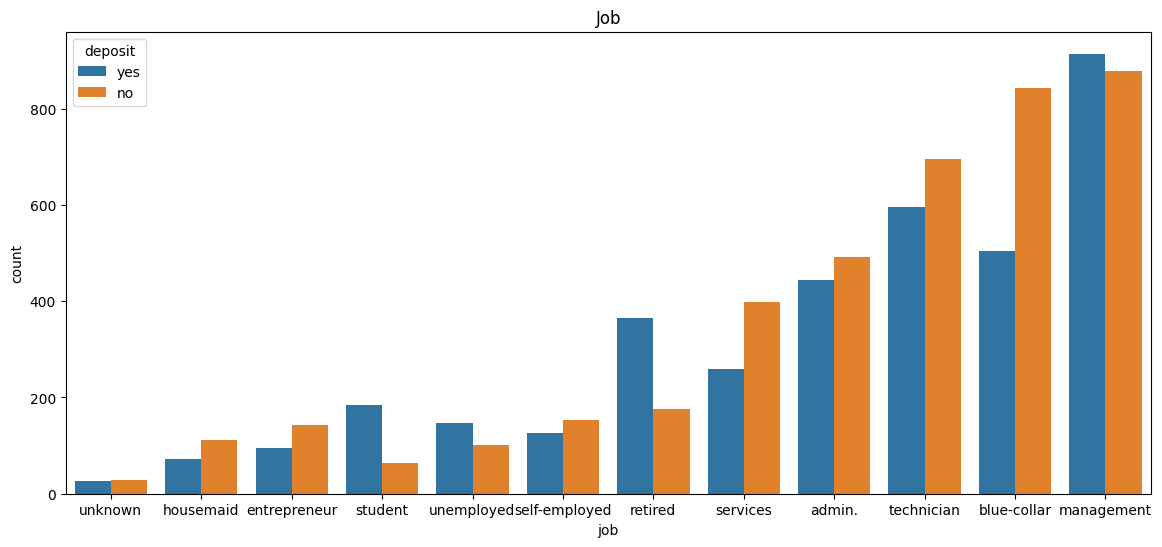

In [9]:
plt.figure(figsize=(14,6))
sns.countplot(x = df['job'], data = df, order = df['job'].value_counts().sort_values(ascending = True).index, hue= 'deposit')
plt.title('Job',fontsize=12)

plt.show()

From the dataset, the criteria for customers interested in opening a term deposit are those who work in management, do not have a housing loan, do not have a personal loan, were contacted via cellular, and whose previous marketing outcome is unknown.

# <span style="color:#C71585">3. Data Preparation</span>

<img src="https://www.cforickarthur.com/wp-content/uploads/2015/12/Checklist-With-Green-Checkmark-Icon-min.jpg" alt="Cover Image" style="width:30%; height:auto;">


### Data Splitting

We will split the data at the beginning to prevent data leakage. By dividing the data into training and testing sets before any analysis or preprocessing, we ensure that information from the test set does not influence the training process. This approach helps maintain the integrity of the evaluation process.

In [10]:
#encode deposit to numeric
df["deposit"] = np.where(df["deposit"]=="no",0,1)

In [11]:
#Separating X and y for train_test_split
X = df.drop("deposit",axis=1)
y = df["deposit"]

Next, we will assume that 20% of the dataset will be used as test data to evaluate the model's performance, while 80% of the dataset will be used as train data to train the model.

In [12]:
#Splitting the data into train and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, stratify=y, test_size=0.2, random_state=2020)
display(X_train.shape,X_test.shape)

(6250, 10)

(1563, 10)

In [13]:
#Combining X_train and y_train
train = X_train.join(y_train).sort_index()
train

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,0
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


In [14]:
#Combining X_test dan y_test
test = X_test.join(y_test).sort_index()
test

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
11,33,housemaid,1107,yes,no,cellular,mar,1,-1,unknown,1
14,30,management,4808,no,no,cellular,mar,1,-1,unknown,1
17,30,services,0,no,no,cellular,jan,1,-1,unknown,0
20,48,services,2597,yes,no,cellular,may,2,355,failure,0
43,57,technician,950,yes,no,cellular,jul,1,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7789,55,admin.,602,no,no,cellular,jun,3,90,success,1
7797,26,blue-collar,78,no,no,telephone,jan,1,-1,unknown,0
7800,72,retired,1129,no,no,cellular,aug,1,-1,unknown,1
7804,52,admin.,423,yes,yes,cellular,oct,2,96,failure,0


For the next step, we will perform data cleaning on the train and test data separately to prevent data leakage.

### Handling Missing Value

In [15]:
#Checking the number of NaN Values

display(train.isna().sum())
display(test.isna().sum())

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

age         0
job         0
balance     0
housing     0
loan        0
contact     0
month       0
campaign    0
pdays       0
poutcome    0
deposit     0
dtype: int64

There are no missing values in the test and train datasets.

### Handling Data Duplicates in the Training Data

In [16]:
#Checking the number of duplicate data in the Train data
display(train.duplicated().sum())

6

In [17]:
#Removing duplicate data in the Train data
train = train.drop_duplicates()

display(train.shape)

(6244, 11)

There are duplicate data in the train data. Therefore, we will remove the rows that contain the duplicate data.

### Data Range Constrains

In [18]:
#Viewing the values of pdays based on poutcome in the train data
display(train.groupby("poutcome")[["pdays"]].value_counts())

poutcome  pdays
failure    181       12
           182       12
           342       12
           91        11
           92        11
                   ... 
success    117        1
           113        1
unknown   -1       4658
           98         1
           188        1
Name: count, Length: 662, dtype: int64

In [19]:
#Viewing the values of pdays based on poutcome in the test data
display(test.groupby("poutcome")[["pdays"]].value_counts())

poutcome  pdays
failure    350        4
           183        4
           99         3
           133        3
           92         3
                   ... 
success    147        1
           154        1
           169        1
           175        1
unknown   -1       1153
Name: count, Length: 277, dtype: int64

In [20]:
#Viewing the unique values in the train data for the poutcome column
display(train["poutcome"].value_counts())
train[train["poutcome"]=="other"].sort_values("pdays")

poutcome
unknown    4660
failure     689
success     593
other       302
Name: count, dtype: int64

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
1605,28,blue-collar,1285,no,no,telephone,jan,2,2,other,0
5787,31,management,1384,yes,no,cellular,jan,2,2,other,0
5753,31,unemployed,315,no,no,cellular,jan,1,2,other,0
810,35,technician,633,yes,yes,cellular,feb,3,5,other,0
3151,26,blue-collar,184,no,no,cellular,feb,2,6,other,0
...,...,...,...,...,...,...,...,...,...,...,...
6669,44,management,1090,no,no,cellular,jul,4,532,other,1
1937,56,management,12356,yes,no,cellular,may,1,551,other,1
3541,39,unemployed,265,yes,no,unknown,may,1,555,other,1
1324,27,blue-collar,821,yes,yes,unknown,sep,1,778,other,0


If the `poutcome` feature is unknown and the `pdays` value is -1, it means the customer was never contacted in the previous campaign. However, there are records where `pdays` is positive but `poutcome` is unknown.

This might be due to errors in the system recording. Therefore, we will change the value in these conditions to other, indicating that the customer was contacted but did not respond.

In [21]:
# Changing the `poutcome` values that need adjustment in the train data

print("before")
display(train.groupby("poutcome")[["pdays"]].value_counts())

train["poutcome"] = np.where((train["pdays"]>0) & (train["poutcome"]=="unknown"),"other",train["poutcome"])

print("after")
display(train.groupby("poutcome")[["pdays"]].value_counts())

before


poutcome  pdays
failure    181       12
           182       12
           342       12
           91        11
           92        11
                   ... 
success    117        1
           113        1
unknown   -1       4658
           98         1
           188        1
Name: count, Length: 662, dtype: int64

after


/var/folders/st/gw4jj341603__cgq15n27q4h0000gn/T/ipykernel_18368/605230228.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  train["poutcome"] = np.where((train["pdays"]>0) & (train["poutcome"]=="unknown"),"other",train["poutcome"])


poutcome  pdays
failure    342       12
           182       12
           181       12
           92        11
           91        11
                   ... 
success    70         1
           68         1
           67         1
           71         1
unknown   -1       4658
Name: count, Length: 660, dtype: int64

In [22]:
# Changing the `poutcome` values that need adjustment in the test data


print("before")
display(test.groupby("poutcome")[["pdays"]].value_counts())

test["poutcome"] = np.where((test["pdays"]>0) & (test["poutcome"]=="unknown"),"other",test["poutcome"])

print("after")
display(test.groupby("poutcome")[["pdays"]].value_counts())

before


poutcome  pdays
failure    350        4
           183        4
           99         3
           133        3
           92         3
                   ... 
success    147        1
           154        1
           169        1
           175        1
unknown   -1       1153
Name: count, Length: 277, dtype: int64

after


poutcome  pdays
failure    350        4
           183        4
           99         3
           133        3
           92         3
                   ... 
success    147        1
           154        1
           169        1
           175        1
unknown   -1       1153
Name: count, Length: 277, dtype: int64

### Handling Outlier

In this section, we will analyze whether there are outliers in the train data that might potentially reduce the model's performance.

In [23]:
#Viewing summary descriptive statistics of the train and test data
display(train.describe())

display(test.describe())

,age,balance,campaign,pdays,deposit
count,6244.000000,6244.000000,6244.000000,6244.000000,6244.000000
mean,41.193786,1519.292761,2.531550,51.721813,0.477899
std,11.912285,3132.582096,2.710401,108.846176,0.499551
min,18.000000,-3058.000000,1.000000,-1.000000,0.000000
25%,32.000000,133.000000,1.000000,-1.000000,0.000000
50%,39.000000,548.500000,2.000000,-1.000000,0.000000
75%,49.000000,1679.750000,3.000000,34.250000,1.000000
max,95.000000,66653.000000,63.000000,854.000000,1.000000


,age,balance,campaign,pdays,deposit
count,1563.000000,1563.000000,1563.000000,1563.000000,1563.000000
mean,41.507997,1490.912988,2.474728,50.358285,0.477927
std,11.961383,2915.567071,2.797446,105.116396,0.499672
min,19.000000,-6847.000000,1.000000,-1.000000,0.000000
25%,32.000000,106.000000,1.000000,-1.000000,0.000000
50%,39.000000,553.000000,2.000000,-1.000000,0.000000
75%,49.000000,1696.500000,3.000000,56.000000,1.000000
max,93.000000,45248.000000,43.000000,782.000000,1.000000


There appears to be a considerable spread in the data for the features age, balance, campaign, and pdays. Let's examine this from the perspective of a boxplot.

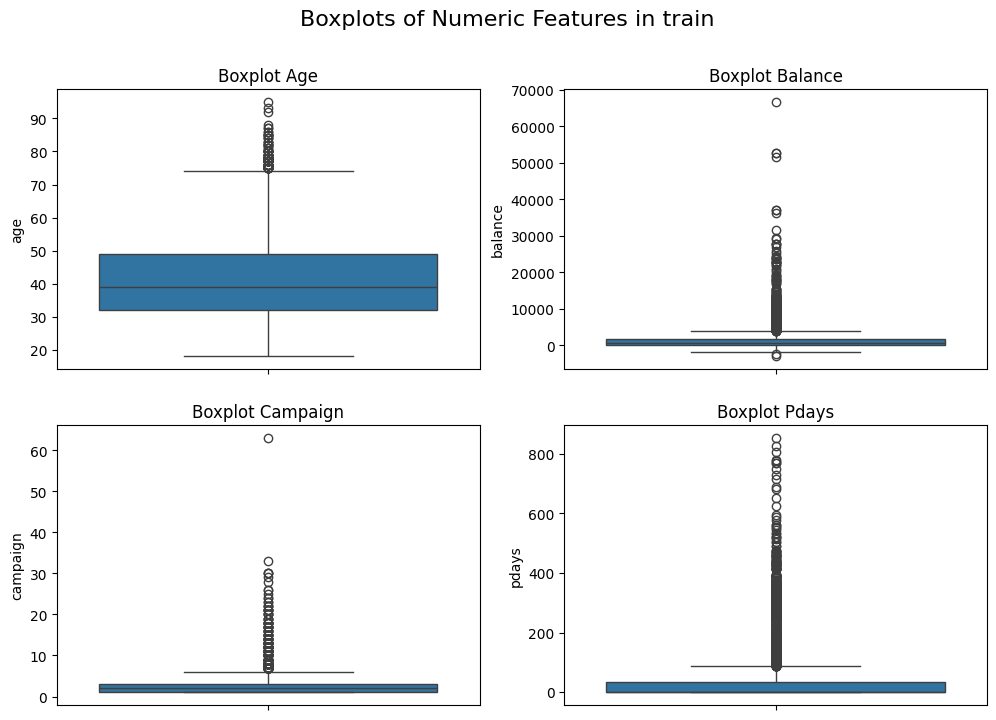

In [24]:
#Boxplot data numeric in train data
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(train["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(train["balance"])
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(train["campaign"])
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(train["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)

plt.show()

In the train data, there are **extreme outliers** in the campaign and balance data.


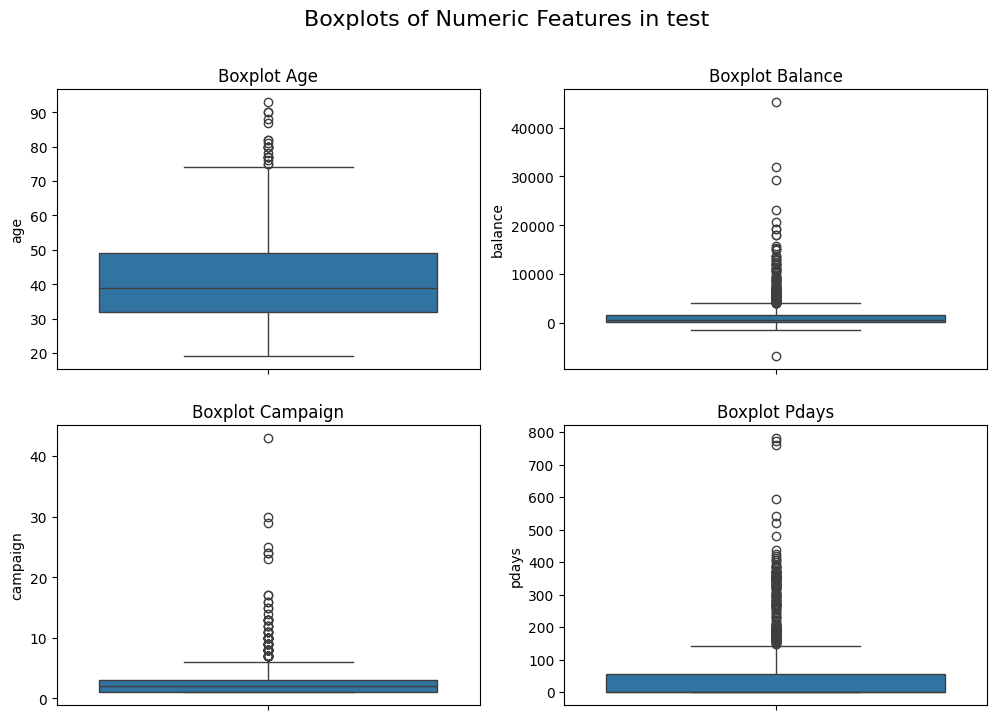

In [25]:
#Boxplot data numeric in test data
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(test["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(test["balance"])
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(test["campaign"])
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(test["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in test", fontsize=16)

plt.show()

In the test data, extreme outliers were also found in the campaign and balance data.

Now we will analyze the data using the IQR.

In [26]:
#Checking outliers by calculating the IQR in the train data (with IQR 1.5)
columns = ["age","balance","campaign","pdays"]
list_Q1 = []
list_Q3 = []
iqr_list= []
list_l_bound = []
list_u_bound = []
length_list = []
percentage_n_list =[]

for col in columns:
    Q3 = train[col].quantile(0.75)
    Q1 = train[col].quantile(0.25)
    IQR = Q3 - Q1
    u_bound = Q3 + 1.5*IQR # IQR 1.5x
    l_bound = Q1 - 1.5*IQR # IQR 1.5x
    length = len(train[(train[col] < l_bound) | (train[col] > u_bound) ])
    percentage_n = round(length/len(train),2)
    list_Q1.append(Q1)
    list_Q3.append(Q3)
    iqr_list.append(IQR)
    list_l_bound.append(l_bound)
    list_u_bound.append(u_bound)
    length_list.append(length)
    percentage_n_list.append(percentage_n)
train_iqr = pd.DataFrame({
    "columns":columns,
    "Q1":list_Q1,
    "Q3":list_Q3,
    "IQR":iqr_list,
    "Lower Bound":list_l_bound,
    "Upper Bound":list_u_bound,
    "n": length_list,
    "n(%)": percentage_n_list
})

train_iqr

,columns,Q1,Q3,IQR,Lower Bound,Upper Bound,n,n(%)
0,age,32.0,49.00,17.00,6.500,74.500,100,0.02
1,balance,133.0,1679.75,1546.75,-2187.125,3999.875,589,0.09
2,campaign,1.0,3.00,2.00,-2.000,6.000,341,0.05
3,pdays,-1.0,34.25,35.25,-53.875,87.125,1455,0.23


In [27]:
#Checking outliers by calculating the IQR in the train data (with IQR 3)
columns = ["age","balance","campaign","pdays"]
list_Q1 = []
list_Q3 = []
iqr_list= []
list_l_bound = []
list_u_bound = []
length_list = []
percentage_n_list =[]

for col in columns:
    Q3 = train[col].quantile(0.75)
    Q1 = train[col].quantile(0.25)
    IQR = Q3 - Q1
    u_bound = Q3 + 3*IQR #IQR 3x
    l_bound = Q1 - 3*IQR #IQR 3x
    length = len(train[(train[col] < l_bound) | (train[col] > u_bound) ])
    percentage_n = round(length/len(train),2)
    list_Q1.append(Q1)
    list_Q3.append(Q3)
    iqr_list.append(IQR)
    list_l_bound.append(l_bound)
    list_u_bound.append(u_bound)
    length_list.append(length)
    percentage_n_list.append(percentage_n)
train_iqr = pd.DataFrame({
    "columns":columns,
    "Q1":list_Q1,
    "Q3":list_Q3,
    "IQR":iqr_list,
    "Lower Bound":list_l_bound,
    "Upper Bound":list_u_bound,
    "n": length_list,
    "n(%)": percentage_n_list
})

train_iqr

,columns,Q1,Q3,IQR,Lower Bound,Upper Bound,n,n(%)
0,age,32.0,49.00,17.00,-19.00,100.0,0,0.00
1,balance,133.0,1679.75,1546.75,-4507.25,6320.0,306,0.05
2,campaign,1.0,3.00,2.00,-5.00,9.0,150,0.02
3,pdays,-1.0,34.25,35.25,-106.75,140.0,1048,0.17



After analyzing the number of outliers in the numeric features using boxplots and IQR calculations, we found that there are many outlier (extreme value) data points.

When compared using boxplots, the test data also contains values above the IQR. Therefore, to enable the program to perform better modeling, we will remove only the extreme outliers by comparing with the boxplot.

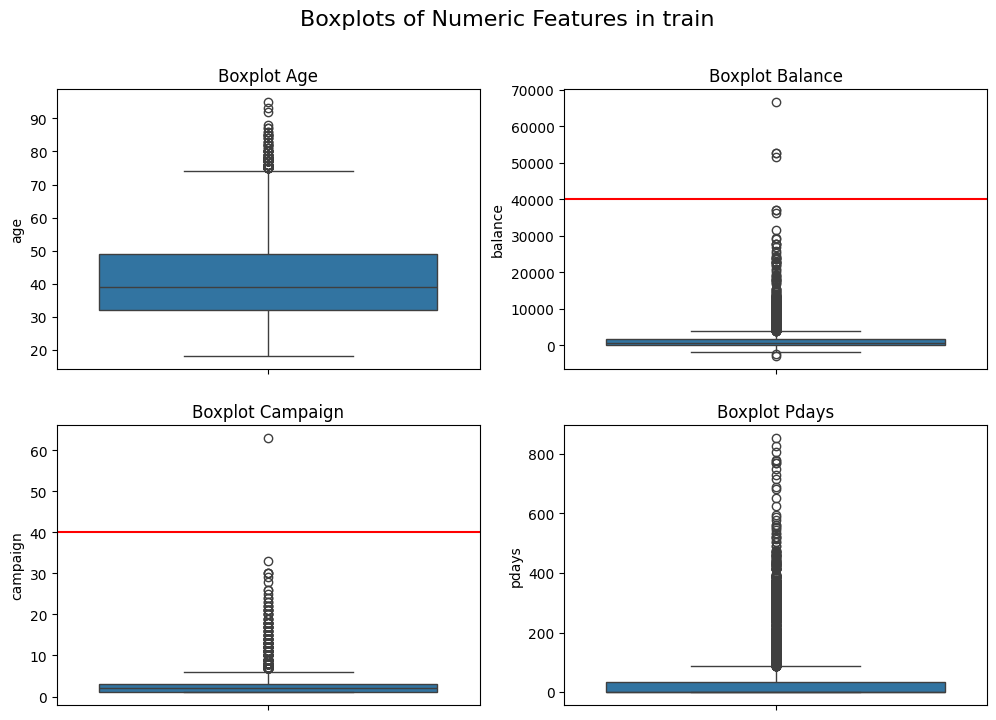

In [28]:
#Marking outlier data in the train data that will be removed
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(train["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(train["balance"])
plt.axhline(40000,c='r')
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(train["campaign"])
plt.axhline(40,c='r')
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(train["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)

plt.show()

In [29]:
#drop all outlier in train data
train = train[train["campaign"]<40]
train = train[train["balance"]<40000]
    
train

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1
2,51,admin.,3025,no,no,cellular,may,1,352,other,1
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0
...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,0
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1
7810,36,unknown,179,no,no,cellular,aug,8,-1,unknown,0
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0


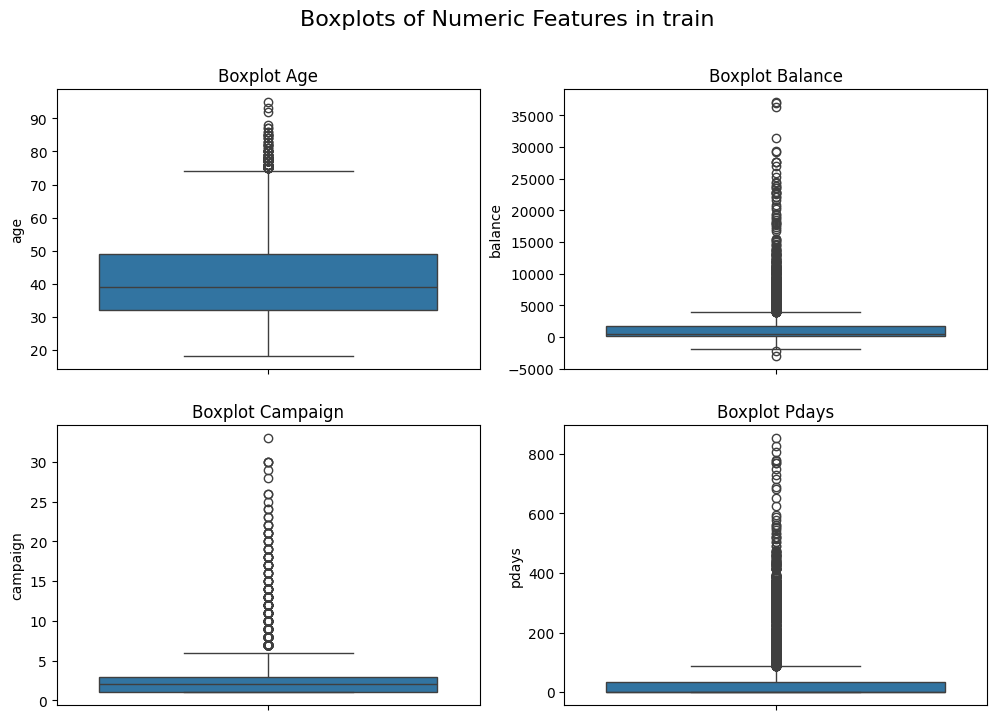

In [30]:
#Results after removing outlier in the train data
plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.boxplot(train["age"])
plt.title("Boxplot Age")

plt.subplot(2,2,2)
sns.boxplot(train["balance"])
plt.title("Boxplot Balance")

plt.subplot(2,2,3)
sns.boxplot(train["campaign"])
plt.title("Boxplot Campaign")

plt.subplot(2,2,4)
sns.boxplot(train["pdays"])
plt.title("Boxplot Pdays")

plt.suptitle("Boxplots of Numeric Features in train", fontsize=16)

plt.show()

In [31]:
#Model limitations on the train data (numerical data)
train.describe()

,age,balance,campaign,pdays,deposit
count,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000
mean,41.182722,1483.274082,2.522199,51.733611,0.477961
std,11.909416,2809.774896,2.600980,108.867730,0.499554
min,18.000000,-3058.000000,1.000000,-1.000000,0.000000
25%,32.000000,132.500000,1.000000,-1.000000,0.000000
50%,39.000000,546.000000,2.000000,-1.000000,0.000000
75%,49.000000,1671.500000,3.000000,34.500000,1.000000
max,95.000000,37127.000000,33.000000,854.000000,1.000000


### Normality Test

Next, we will check the normality of the numeric data using histplot.

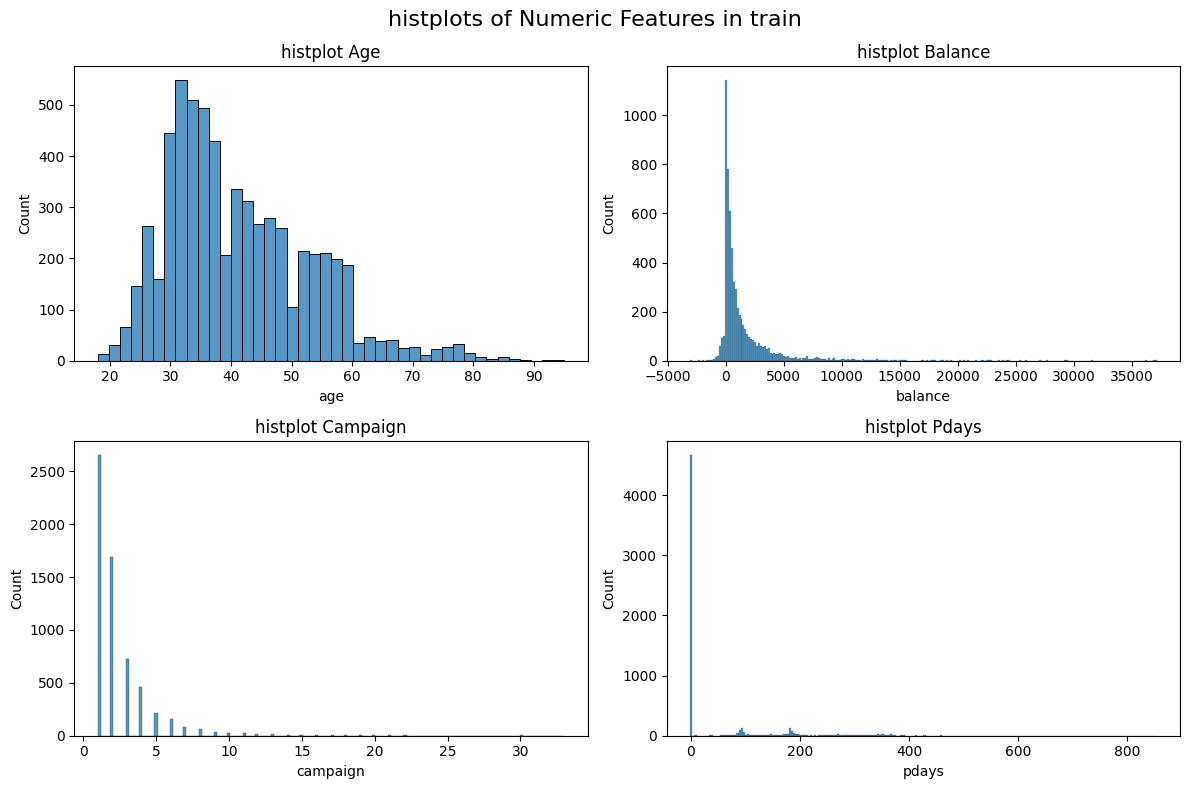

In [32]:
#histplot of numerical data in the train data

plt.figure(figsize=(12,8))

plt.subplot(2,2,1)
sns.histplot(train["age"])
plt.title("histplot Age")

plt.subplot(2,2,2)
sns.histplot(train["balance"])
plt.title("histplot Balance")

plt.subplot(2,2,3)
sns.histplot(train["campaign"])
plt.title("histplot Campaign")

plt.subplot(2,2,4)
sns.histplot(train["pdays"])
plt.title("histplot Pdays")

plt.suptitle("histplots of Numeric Features in train", fontsize=16)
plt.tight_layout()
plt.show()

We can see that none of the numerical data is normally distributed. Therefore, in the model pipeline, all features will undergo robust scaling to ensure the model is more consistent with data containing outliers.

### Feature Engineering

#### Bin Age

To further enrich the model, we will generate a new feature called bin_age, which groups the ages of potential customers into four categories:

| Age Group | Explanation                                                                                  |
|---------------|-----------------------------------------------------------------------------------------|
| Under 25   | Generally, this group has limited income and focuses more on long-term investments or consumptive needs.|
| 25 - 40	 | Typically, individuals in this age range are building their careers and families, making it more likely for them to have sufficient savings to invest in long-term deposits. |
| 41 - 60 | This group usually has stable income and savings, along with long-term financial goals such as retirement or funding children's education.               |
| Over 60    | Typically, this age group has substantial savings and prioritizes safe and stable investments for retirement.                                    |


In [33]:
train['bin_age']=pd.cut(train['age'],bins=[0, 25, 40, 60, float('inf')],labels=["<25 tahun","25 - 40 tahun", "41 - 60 tahun",">60 tahun"])
display(train.head(),test.head())

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,bin_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,41 - 60 tahun
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,25 - 40 tahun
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,41 - 60 tahun
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,25 - 40 tahun
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,25 - 40 tahun


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit
11,33,housemaid,1107,yes,no,cellular,mar,1,-1,unknown,1
14,30,management,4808,no,no,cellular,mar,1,-1,unknown,1
17,30,services,0,no,no,cellular,jan,1,-1,unknown,0
20,48,services,2597,yes,no,cellular,may,2,355,failure,0
43,57,technician,950,yes,no,cellular,jul,1,-1,unknown,0


In [34]:
bin_age=list(train["bin_age"].unique().categories)
bin_age

['<25 tahun', '25 - 40 tahun', '41 - 60 tahun', '>60 tahun']

In [35]:
test['bin_age'] = pd.cut(test['age'], bins=[0, 25, 40, 60, float('inf')],labels=["<25 tahun","25 - 40 tahun", "41 - 60 tahun",">60 tahun"])

In [36]:
display(train["bin_age"].value_counts())
display(test["bin_age"].value_counts())

bin_age
25 - 40 tahun    3237
41 - 60 tahun    2398
>60 tahun         348
<25 tahun         256
Name: count, dtype: int64

bin_age
25 - 40 tahun    802
41 - 60 tahun    620
>60 tahun         90
<25 tahun         51
Name: count, dtype: int64

### Handling Categorical Data

Next, we will adjust the categorical data. First, we will look at the number of unique values in the categorical data.

In [37]:
#Viewing unique values in the train data

pd.set_option('display.max_colwidth', None)

columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']
values = []
nunique_list = []
for i in columns:
    value = train[i].unique()
    nunique = train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,job,"[admin., self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed, unknown]",12
1,housing,"[no, yes]",2
2,loan,"[no, yes]",2
3,contact,"[cellular, telephone, unknown]",3
4,month,"[jun, apr, may, nov, jan, sep, feb, aug, jul, oct, mar, dec]",12
5,poutcome,"[unknown, other, failure, success]",4


In [38]:
#Viewing unique values in the train data with value counts

for i in train.select_dtypes(object).columns:
    display(pd.DataFrame(train[i].value_counts()))

,count
job,
management,1428
technician,1040
blue-collar,1033
admin.,758
services,544
retired,431
self-employed,230
student,200
unemployed,197


,count
housing,
no,3301
yes,2938


,count
loan,
no,5414
yes,825


,count
contact,
cellular,4478
unknown,1324
telephone,437


,count
month,
may,1590
aug,870
jul,832
jun,697
apr,525
nov,520
feb,416
oct,229
jan,183


,count
poutcome,
unknown,4654
failure,689
success,592
other,304


There are unknown values in the `job` and `contact` features in the train data, and they may also be present in the test data. Therefore, we will encode the unknown data as np.NaN to be imputed using the mode in the model pipeline.

The unknown values in the `poutcome` data are not treated as missing values because the unknown value in the `poutcome` column indicates that the prospective customer has not been contacted before.

In [39]:
#Encoding unknown values in job and contact data as nan for later imputation

train["job"] = np.where(train["job"]=="unknown",np.nan,train["job"])
train["contact"] = np.where(train["contact"]=="unknown",np.nan,train["contact"])


test["job"] = np.where(test["job"]=="unknown",np.nan,test["job"])
test["contact"] = np.where(test["contact"]=="unknown",np.nan,test["contact"])


display(train,test)

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,bin_age
0,55,admin.,1662,no,no,cellular,jun,2,-1,unknown,1,41 - 60 tahun
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown,1,25 - 40 tahun
2,51,admin.,3025,no,no,cellular,may,1,352,other,1,41 - 60 tahun
3,38,services,-87,yes,no,cellular,may,1,-1,unknown,0,25 - 40 tahun
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown,0,25 - 40 tahun
...,...,...,...,...,...,...,...,...,...,...,...,...
7807,33,management,0,yes,yes,cellular,may,2,-1,unknown,0,25 - 40 tahun
7809,48,housemaid,5473,no,no,cellular,feb,2,184,success,1,41 - 60 tahun
7810,36,NaN,179,no,no,cellular,aug,8,-1,unknown,0,25 - 40 tahun
7811,31,admin.,54,yes,no,cellular,nov,1,-1,unknown,0,25 - 40 tahun


,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome,deposit,bin_age
11,33,housemaid,1107,yes,no,cellular,mar,1,-1,unknown,1,25 - 40 tahun
14,30,management,4808,no,no,cellular,mar,1,-1,unknown,1,25 - 40 tahun
17,30,services,0,no,no,cellular,jan,1,-1,unknown,0,25 - 40 tahun
20,48,services,2597,yes,no,cellular,may,2,355,failure,0,41 - 60 tahun
43,57,technician,950,yes,no,cellular,jul,1,-1,unknown,0,41 - 60 tahun
...,...,...,...,...,...,...,...,...,...,...,...,...
7789,55,admin.,602,no,no,cellular,jun,3,90,success,1,41 - 60 tahun
7797,26,blue-collar,78,no,no,telephone,jan,1,-1,unknown,0,25 - 40 tahun
7800,72,retired,1129,no,no,cellular,aug,1,-1,unknown,1,>60 tahun
7804,52,admin.,423,yes,yes,cellular,oct,2,96,failure,0,41 - 60 tahun


In [40]:
#Checking the number of NaN (unknown) values in each column
train.isna().sum()/len(train)

age         0.000000
job         0.007533
balance     0.000000
housing     0.000000
loan        0.000000
contact     0.212213
month       0.000000
campaign    0.000000
pdays       0.000000
poutcome    0.000000
deposit     0.000000
bin_age     0.000000
dtype: float64

Besides the unknown data, there is a typo in the job value "admin." in the job feature. So here we will correct the value to "admin" in both the train and test data.

In [41]:
#Adjusting the value names
train["job"] = train["job"].str.replace(".","")
train["job"].unique()

array(['admin', 'self-employed', 'services', 'housemaid', 'technician',
       'management', 'student', 'blue-collar', 'entrepreneur', 'retired',
       'unemployed', nan], dtype=object)

In [42]:
#Adjusting the value names
test["job"] = test["job"].str.replace(".","")
test["job"].unique()

array(['housemaid', 'management', 'services', 'technician', 'retired',
       'blue-collar', 'student', 'admin', 'self-employed', 'unemployed',
       'entrepreneur', nan], dtype=object)

# <span style="color:#C71585"> 4. Modeling & Evaluation</span>

<img src="https://imageio.forbes.com/specials-images/imageserve/64d24936a0c9451a52034c63/Training-machine-learning-model-concept/960x0.jpg?format=jpg&width=960" alt="Cover Image" style="width:50%; height:auto;">


In this section, the train data will be used to train the model and use that model to predict labels on the test data. The steps involved in this stage are:

[**Modeling (Default)**](#Modeling-(Default))

[**Modeling (Hyperparameter Tuning)**](#Modeling-(Hyperparameter-Tuning))

[**Modeling (Threshold Adjustment**](#Modeling-(Threshold-Adjustment))

[**Feature Evaluation**](#Feature-Evaluation)


[**Business Outcome Evaluation**](#Business-Outcome-Evaluation)

[**Model Constraints**](#Model-Constraints)

### Modeling (Default)

At this stage, we will perform modeling without hyperparameter tuning on 4 machine learning model options:

- Random Forest Classifier
- Decision Tree Classifier
- Logistic Regression
- Gradient Boosting Classifier

Before modeling, we will perform data preprocessing with the following steps:

1. Separate the train data into X_train and y_train, and the test data into X_test and y_test.
2. Numeric data will be imputed with the median if NaN values are found in either X_train or X_test. Then, both datasets will go through robust scaling.
3. Nominal categorical data, except for the month, will be imputed with the mode if NaN values are found in either X_train or X_test. Then, the data will go through encoding using the One Hot Encoding method with the parameter drop="first".
4. Ordinal categorical data will go through encoding using the Ordinal Encoder method.
5. Specifically, the nominal categorical data for the month will go through encoding using the Label Encoder method to reduce the number of columns.

After the preprocessing steps are completed, the data will go through modeling using the 4 models mentioned earlier.

The best model will be selected based on the F1 score and will be used to predict values on the X_test data. These prediction results will serve as the benchmark for the model before performing hyperparameter tuning in the next stage.

Additionally, in the test data, we will examine more closely whether the binning feature created earlier is more effective in helping the model make predictions by analyzing feature importance.

In [43]:
from sklearn.preprocessing import OneHotEncoder, OrdinalEncoder, LabelEncoder,FunctionTransformer
import category_encoders as ce #untuk binary encoder
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import MinMaxScaler, StandardScaler, RobustScaler

In [44]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from xgboost import XGBClassifier
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.metrics import f1_score, accuracy_score, recall_score, precision_score
from sklearn.pipeline import Pipeline
from sklearn.model_selection import GridSearchCV,StratifiedKFold,train_test_split, cross_val_score
from sklearn.feature_selection import SelectPercentile, SelectKBest,f_regression, f_classif
from sklearn.metrics import RocCurveDisplay
from sklearn.impute import SimpleImputer
import time

In [45]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
X_train = train.drop("deposit",axis=1)
y_train = train["deposit"]

X_test = test.drop("deposit",axis=1)
y_test = test["deposit"]

In [46]:
class MonthLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_dict = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: x.map(self.label_dict))

    def get_feature_names_out(self, input_features):
        return input_features
    
categorical_features = ['job', 'housing', 'loan', 'contact', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

numeric_features = ['balance', 'pdays','campaign','age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])   
    

# Update the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('ordinal_c1', OrdinalEncoder(categories=[['<25 tahun', '25 - 40 tahun', '41 - 60 tahun', '>60 tahun']]), ["bin_age"]),
        ('month_encoder', MonthLabelEncoder(), ['month'])
    ], remainder="passthrough")

In [47]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('classifier', RandomForestClassifier())  # Placeholder for classifier
])

param_grid = [
    {
        'classifier': [RandomForestClassifier(random_state=42),
                       DecisionTreeClassifier(random_state=42),
                       LogisticRegression(random_state=42),
                       XGBClassifier(random_state=2020)],
    },
]

# Create GridSearchCV with pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1',error_score="raise")

# Measure the fitting time
start_time = time.time()


# Fit GridSearchCV to the data
gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Fitting time: 5.22 seconds


In [48]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['balance', 'pdays',
                                                   'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  [...
                               feature_types=None, gamma=None, grow_policy=None,
                               importance_type=None,
                               interaction_constraints=None, learning_rate=None,
                               max_bin=None, max_cat_threshold=None,
                               max_cat_to_onehot=None, max_delta_step=None,
                               max_depth=None, max_leaves=None,
                               min_child_weight=None, missing=nan,
                               monotone_constraints=None, multi_strategy=None,
                               n_estimators=None, n_jobs=None,
                               num_parallel_tree=None, random_state=2020, ...))])

In [49]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score")

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
3,0.304663,0.073164,0.033440,0.021479,"XGBClassifier(base_score=None, booster=None, c...","{'classifier': XGBClassifier(base_score=None, ...",0.665434,0.663771,0.644161,0.636194,0.658866,0.653685,0.011517,1
0,1.559368,0.011489,0.056035,0.001452,RandomForestClassifier(random_state=42),{'classifier': RandomForestClassifier(random_s...,0.639419,0.644188,0.624014,0.636364,0.659071,0.640611,0.011388,2
2,0.235017,0.024835,0.021704,0.002922,LogisticRegression(random_state=42),{'classifier': LogisticRegression(random_state...,0.618049,0.621324,0.617352,0.606512,0.645219,0.621691,0.012777,3
1,0.140035,0.015397,0.026638,0.003202,DecisionTreeClassifier(random_state=42),{'classifier': DecisionTreeClassifier(random_s...,0.594458,0.609060,0.612745,0.593670,0.620634,0.606113,0.010528,4


In [50]:
y_pred=gscv.best_estimator_.predict(X_test)
print('f1_score',f1_score(y_test, y_pred))

f1_score 0.6440433212996389


In [51]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_train_encoded = transformer.transform(X_train)
X_train_encoded = pd.DataFrame(X_train_encoded, columns=feature_names)
X_train_encoded

,num__balance,num__pdays,num__campaign,num__age,cat__job_admin,cat__job_blue-collar,cat__job_entrepreneur,cat__job_housemaid,cat__job_management,cat__job_retired,...,cat__loan_no,cat__loan_yes,cat__contact_cellular,cat__contact_telephone,cat__poutcome_failure,cat__poutcome_other,cat__poutcome_success,cat__poutcome_unknown,ordinal_c1__bin_age,month_encoder__month
0,0.725146,0.000000,0.0,0.941176,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,2.0,6.0
1,-2.341780,0.000000,0.5,0.000000,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,4.0
2,1.610786,9.943662,-0.5,0.705882,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,1.0,0.0,0.0,2.0,5.0
3,-0.411306,0.000000,-0.5,-0.058824,0.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
4,-0.221572,0.000000,1.0,-0.176471,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,1.0,11.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
6234,-0.354776,0.000000,0.0,-0.352941,0.0,0.0,0.0,0.0,1.0,0.0,...,0.0,1.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,5.0
6235,3.201429,5.211268,0.0,0.529412,0.0,0.0,0.0,1.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,2.0,2.0
6236,-0.238467,0.000000,3.0,-0.176471,0.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,8.0
6237,-0.319688,0.000000,-0.5,-0.470588,1.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,1.0,1.0,11.0


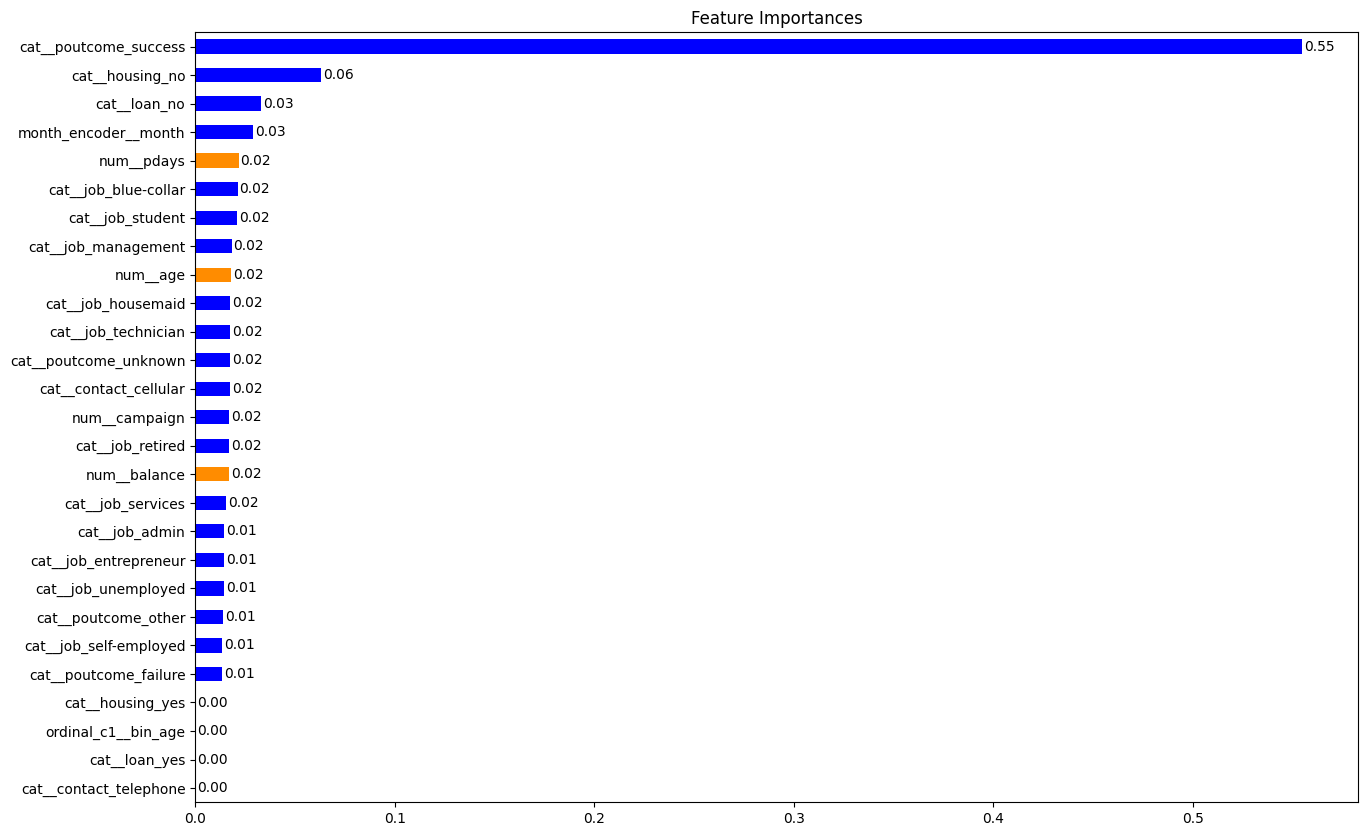

In [52]:
# Get the best estimator from GridSearchCV
best_estimator = gscv.best_estimator_

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Get the feature importances from the final estimator
feature_importances = final_estimator.feature_importances_

# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Create a Series with feature importances and sort it
model_coef = pd.Series(feature_importances, index=X_train_encoded.columns).sort_values()

# Plot the feature importances

colors = ['darkorange' if feature in ['num__age', 'num__pdays', 'num__balance']
          else 'red' if feature in ['ordinal_c1__bin_age']
          else 'blue' for feature in model_coef.index]



plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances',color=colors)


# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.001,  # position x (at the end of the bar)
            i.get_y() + i.get_height() / 2,  # position y (middle of the bar)
            f'{i.get_width():.2f}',  # text to display (feature importance value)
            ha='left',  # horizontal alignment (left align)
            va='center')  # vertical alignment (center align)
plt.show()

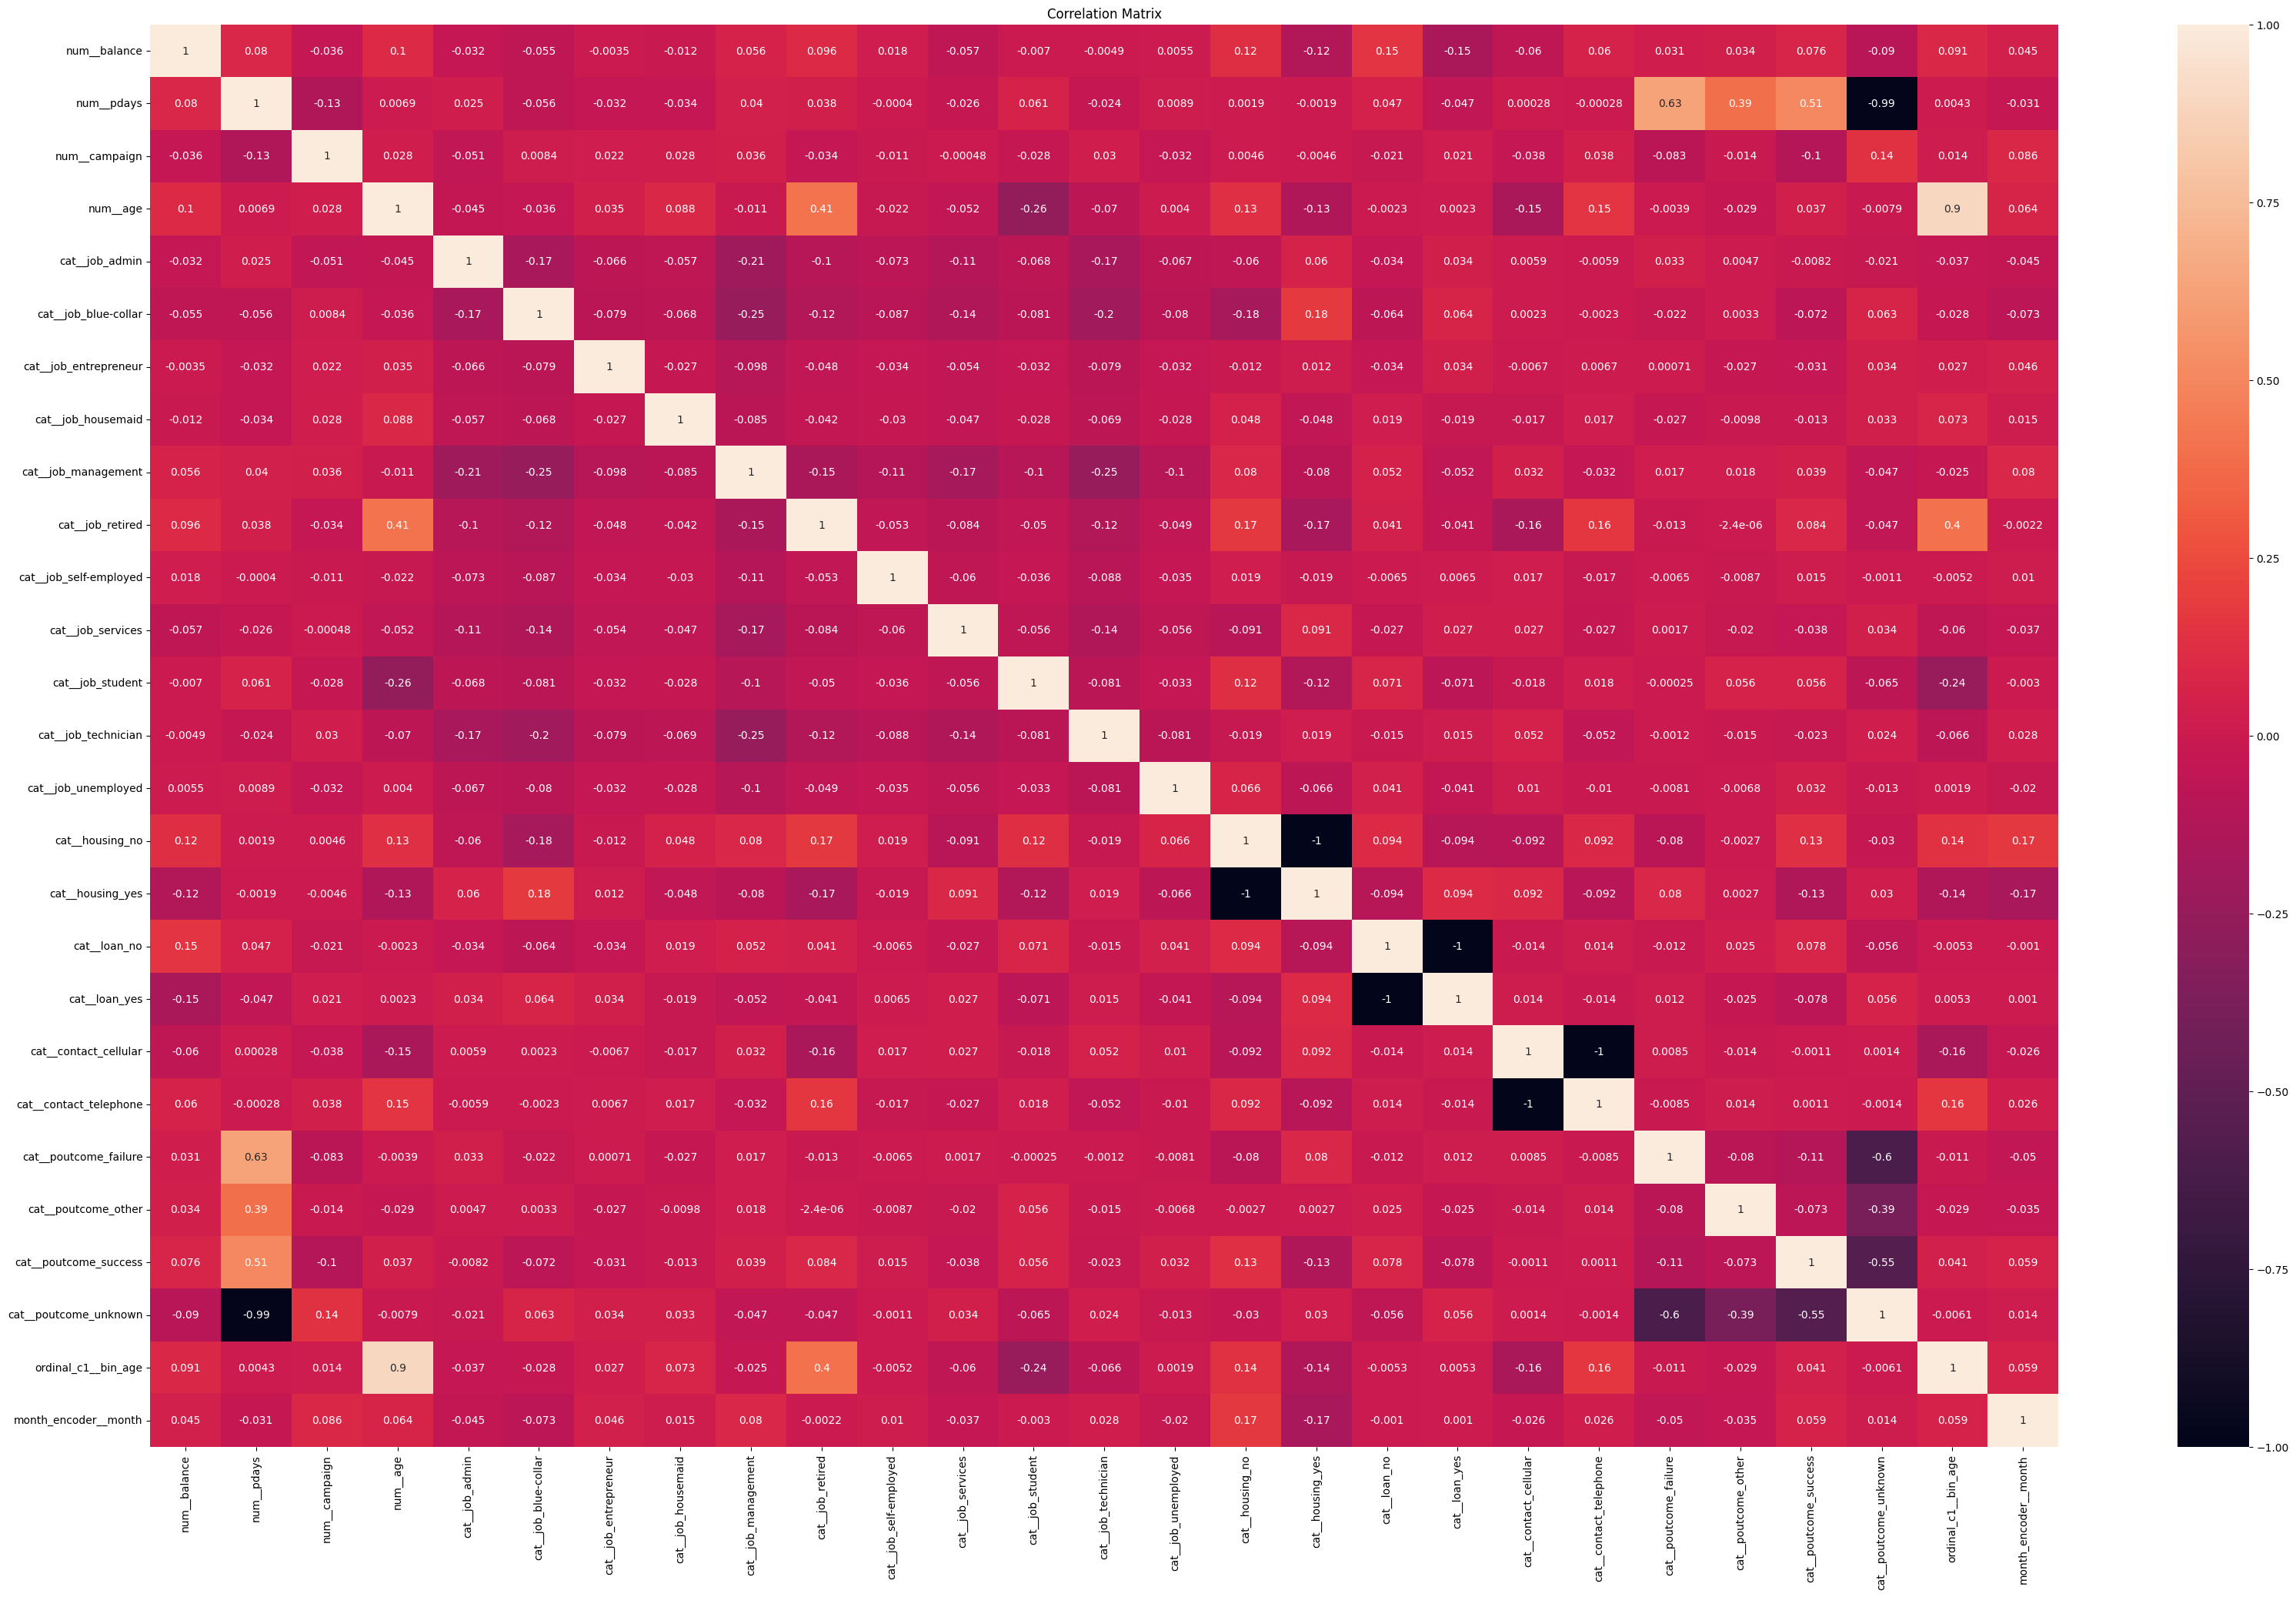

In [53]:
plt.figure(figsize=(40,24))
sns.heatmap(X_train_encoded.corr(method="spearman"),annot=True)
plt.title("Correlation Matrix")
plt.show()

In [54]:
dfcorr=X_train_encoded.select_dtypes(include='number')
corrMatrix=dfcorr.corr(method='spearman')
already_in = set()
result = []
for col in corrMatrix:
    large_corr = corrMatrix[col][corrMatrix[col] >= 0.75 ].index.tolist()
    if large_corr and col not in already_in:
        already_in.update(set(large_corr))
        large_corr.append(col)
        result.append(large_corr)

result

[['num__balance', 'num__balance'],
 ['num__pdays', 'num__pdays'],
 ['num__campaign', 'num__campaign'],
 ['num__age', 'ordinal_c1__bin_age', 'num__age'],
 ['cat__job_admin', 'cat__job_admin'],
 ['cat__job_blue-collar', 'cat__job_blue-collar'],
 ['cat__job_entrepreneur', 'cat__job_entrepreneur'],
 ['cat__job_housemaid', 'cat__job_housemaid'],
 ['cat__job_management', 'cat__job_management'],
 ['cat__job_retired', 'cat__job_retired'],
 ['cat__job_self-employed', 'cat__job_self-employed'],
 ['cat__job_services', 'cat__job_services'],
 ['cat__job_student', 'cat__job_student'],
 ['cat__job_technician', 'cat__job_technician'],
 ['cat__job_unemployed', 'cat__job_unemployed'],
 ['cat__housing_no', 'cat__housing_no'],
 ['cat__housing_yes', 'cat__housing_yes'],
 ['cat__loan_no', 'cat__loan_no'],
 ['cat__loan_yes', 'cat__loan_yes'],
 ['cat__contact_cellular', 'cat__contact_cellular'],
 ['cat__contact_telephone', 'cat__contact_telephone'],
 ['cat__poutcome_failure', 'cat__poutcome_failure'],
 ['cat_

By default (without hyperparameter tuning), the random forest classifier model has the highest f1_score performance.

There is a correlation between the **ordinal_c1__bin_age** feature and the **num__age** feature.

We can see in the feature importance graph that the **num__age** feature has a higher feature importance value compared to **ordinal_c1__bin_age**.

Therefore, we will adjust the feature columns in the train data to include only those with higher feature importance and no multicollinearity.

## Modeling (Hyperparameter Tuning)


At this stage, we will remove multicollinearity in the train and test data. We will rerun the previous 4 model options. However, at this stage, we will improve model performance by performing hyperparameter tuning and selecting only the top 15 features that can best predict using Select K Best.

We will also compare the models without hyperparameter tuning, but this time without binning features and only selecting the top 15 features that can best predict using Select K Best.

After finding the model with the highest f1_score performance, we will further improve its performance by adjusting the probability threshold for classification prediction.

At the final modeling stage, we will determine:

- The type of model, parameter selection, and threshold adjustment that best predict the test data based on f1_score.
- Which features most influence the model.

In [55]:
train.reset_index(drop=True,inplace=True)
test.reset_index(drop=True,inplace=True)
X_train = train.drop(["deposit","bin_age"],axis=1)
y_train = train["deposit"]

X_test = test.drop(["deposit","bin_age"],axis=1)
y_test = test["deposit"]

In [56]:
class MonthLabelEncoder(BaseEstimator, TransformerMixin):
    def __init__(self):
        self.label_dict = {
            'jan': 1, 'feb': 2, 'mar': 3, 'apr': 4, 'may': 5, 'jun': 6,
            'jul': 7, 'aug': 8, 'sep': 9, 'oct': 10, 'nov': 11, 'dec': 12
        }

    def fit(self, X, y=None):
        return self

    def transform(self, X):
        return X.apply(lambda x: x.map(self.label_dict))

    def get_feature_names_out(self, input_features):
        return input_features
    
categorical_features = ['job', 'housing', 'loan', 'contact', 'poutcome']
categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='most_frequent')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])
numeric_features = ['pdays','campaign','age']
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', RobustScaler())])   
    

# Update the preprocessor
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features),
        ('month_encoder', MonthLabelEncoder(), ['month'])
    ], remainder="passthrough")

In [57]:
pipeline = Pipeline(steps=[
    ("preprocessor", preprocessor),
    ('feature_selection', SelectKBest(score_func=f_classif)),
    ('classifier', RandomForestClassifier())  # Placeholder for classifier
])

param_grid = [
        {
        'feature_selection__k': [15],  
        'classifier': [RandomForestClassifier(random_state=2020), #criterion='gini',n_estimators=100,max_depth=None,min_samples_split=2,min_samples_leaf=1
                       DecisionTreeClassifier(random_state=2020), #criterion='gini',max_depth=None,min_samples_split=2,min_samples_leaf=1
                       LogisticRegression(random_state=2020), #solver='lbfsg'
                       XGBClassifier(random_state=2020)], 
    },
        {
        'feature_selection__k': [15],  
        'classifier': [RandomForestClassifier(random_state=2020)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__n_estimators': [40,50,75,100],
        'classifier__max_depth': [None, 10, 15,20,25,30],
        'classifier__min_samples_split': [2,5,10,15,20],
        'classifier__min_samples_leaf': [1,4,8,10]
    },
    {
        'feature_selection__k': [15],  
        'classifier': [DecisionTreeClassifier(random_state=2020)],
        'classifier__criterion': ["gini", "entropy", "log_loss"],
        'classifier__max_depth': [None, 10,15, 20, 25, 30],
        'classifier__min_samples_split': [2, 5, 10],
        'classifier__min_samples_leaf': [1, 2, 4]
    },
            {
        'feature_selection__k': [15],  
        'classifier': [LogisticRegression(max_iter=1000,random_state=2020)],
        'classifier__solver': ['lbfgs', 'liblinear']
    },
        {
        'feature_selection__k': [15],  
        'classifier': [XGBClassifier(random_state=2020)],
        'classifier__n_estimators': [None,50, 100, 200],
        'classifier__max_depth': [None, 20,30,40],
        'classifier__learning_rate': [None,0.01, 0.1],
    }
    
]

# Create GridSearchCV with pipeline
gscv = GridSearchCV(pipeline, param_grid, cv=5, n_jobs=-1, scoring='f1')

# Measure the fitting time
start_time = time.time()


# Fit GridSearchCV to data
gscv.fit(X_train, y_train)


end_time = time.time()

fitting_time = end_time - start_time
print(f"Fitting time: {fitting_time:.2f} seconds")

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(
/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_ite

Fitting time: 587.58 seconds


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [58]:
gscv.best_estimator_

Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['pdays', 'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'poutcome']),
                                                 ('month_encoder',
                                                  MonthLabelEncoder(),
                                                  ['month'])])),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier', LogisticRegression(random_state=2020))])

In [59]:
pd.DataFrame(gscv.cv_results_).sort_values("rank_test_score").head(15)

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_classifier,param_feature_selection__k,param_classifier__criterion,param_classifier__max_depth,param_classifier__min_samples_leaf,param_classifier__min_samples_split,...,param_classifier__learning_rate,params,split0_test_score,split1_test_score,split2_test_score,split3_test_score,split4_test_score,mean_test_score,std_test_score,rank_test_score
2,0.129421,0.017039,0.019425,0.002779,LogisticRegression(random_state=2020),15,NaN,NaN,NaN,NaN,...,NaN,{'classifier': LogisticRegression(random_state...,0.635452,0.627724,0.621395,0.633697,0.645215,0.632696,0.007972,1
637,0.340684,0.009117,0.031081,0.001242,RandomForestClassifier(random_state=2020),15,entropy,10,10,15,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
1113,0.349027,0.011511,0.033160,0.001236,RandomForestClassifier(random_state=2020),15,log_loss,10,10,10,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
629,0.343929,0.014730,0.032151,0.000616,RandomForestClassifier(random_state=2020),15,entropy,10,10,5,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
625,0.355607,0.008477,0.033186,0.000992,RandomForestClassifier(random_state=2020),15,entropy,10,10,2,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
1117,0.351083,0.007073,0.033230,0.003038,RandomForestClassifier(random_state=2020),15,log_loss,10,10,15,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
1109,0.371066,0.004787,0.038306,0.004843,RandomForestClassifier(random_state=2020),15,log_loss,10,10,5,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
641,0.332523,0.009063,0.030255,0.000800,RandomForestClassifier(random_state=2020),15,entropy,10,10,20,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
1121,0.345378,0.009311,0.031821,0.001878,RandomForestClassifier(random_state=2020),15,log_loss,10,10,20,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2
633,0.341725,0.009319,0.033568,0.002726,RandomForestClassifier(random_state=2020),15,entropy,10,10,10,...,NaN,{'classifier': RandomForestClassifier(random_s...,0.642722,0.630292,0.619827,0.621415,0.635036,0.629858,0.008537,2


The Logistic Regression model has a higher F1 Score on the train data, which is 0.632696 with a standard deviation of 0.007972. In comparison, the second-best model, the Random Forest classifier, has an F1 Score of 0.629858 with a standard deviation of 0.008537.

We will choose the Logistic Regression model because it has a higher F1 Score and is more consistent due to its lower standard deviation.

In [60]:
# Get the mean test scores and corresponding parameters
results = pd.DataFrame(gscv.cv_results_)
results = results.sort_values(by='rank_test_score').reset_index()

best_params = results.loc[0, 'params']  # Get the parameters for the best estimator
best_params

# Create a new estimator with the best parameters
new_best_estimator = gscv.estimator.set_params(**best_params)
new_best_estimator


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['pdays', 'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'poutcome']),
                                                 ('month_encoder',
                                                  MonthLabelEncoder(),
                                                  ['month'])])),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier', LogisticRegression(random_state=2020))])

In [61]:
# Fit the best estimator
new_best_estimator.fit(X_train, y_train)

y_pred=new_best_estimator.predict(X_test)
print('f1_score',f1_score(y_test, y_pred))

f1_score 0.6230876216968011


/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


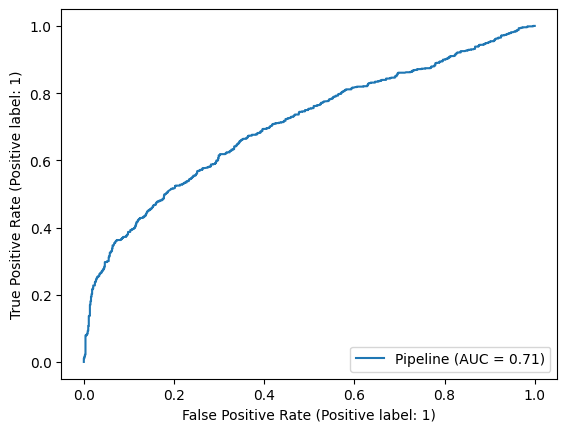

In [62]:
RocCurveDisplay.from_estimator(new_best_estimator,X_test, y_test)

AUC represents the level or measure of separation between classes. It illustrates how well the model can distinguish between classes.

An AUC of 0.71 means there is a 71% chance that the model will be able to differentiate between positive and negative classes.

## Modeling (Threshold Adjustment)

In [63]:
model=new_best_estimator
model.fit(X_train,y_train)

th_value=[i/100 for i in range(1,99)]
score=0
score_list=[]

for i in th_value:
    y_prob=model.predict_proba(X_test)[:,1]
    y_pred=np.where(y_prob>i,1,0)
    score_temp=f1_score(y_test,y_pred)
    score_list.append(score_temp)

th_f1 = pd.DataFrame({
    'th_value':th_value,
    "f1_score":score_list
})

th_f1=th_f1.sort_values("f1_score",ascending=False)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


In [64]:
th_f1

,th_value,f1_score
34,0.35,0.660490
35,0.36,0.659634
33,0.34,0.657447
36,0.37,0.656514
37,0.38,0.654588
...,...,...
93,0.94,0.021192
94,0.95,0.005340
95,0.96,0.000000
96,0.97,0.000000


In [65]:
th_f1.head(1)["th_value"].values

array([0.35])

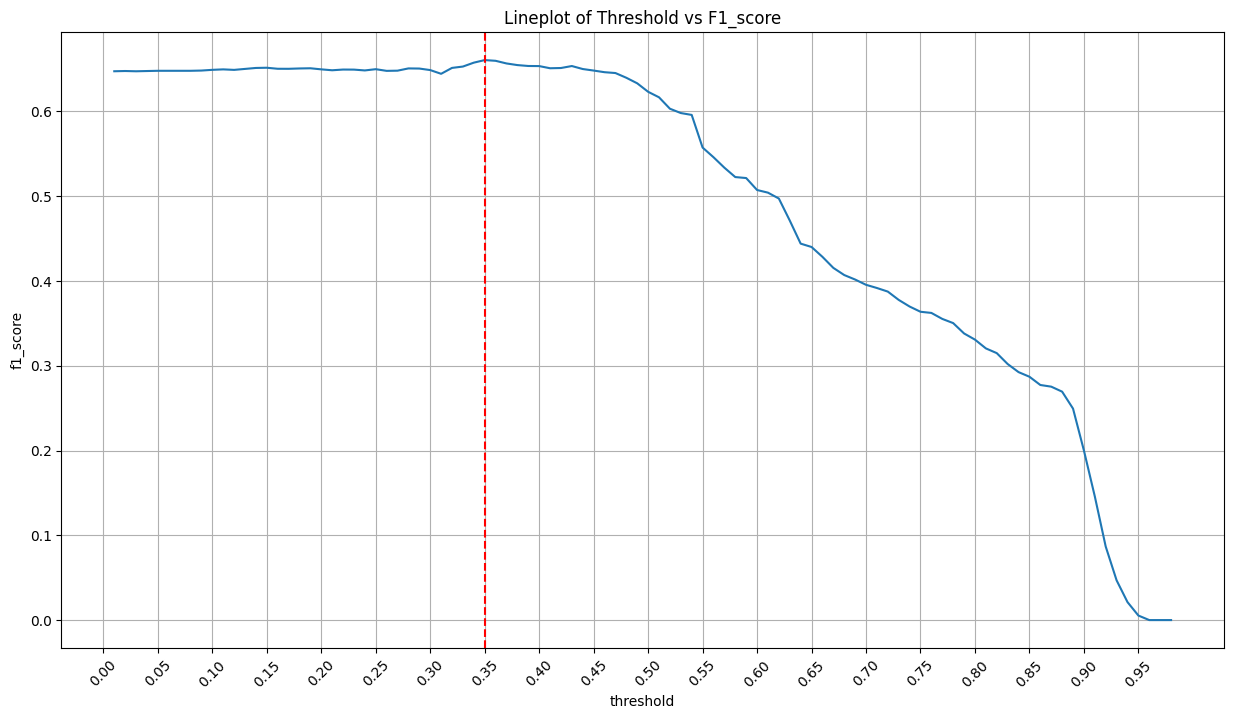

In [66]:
plt.figure(figsize=(15,8))
sns.lineplot(x=th_value,y=score_list)
plt.grid()
plt.xticks(np.arange(0,1,0.05),rotation=45)
plt.ylabel("f1_score")
plt.xlabel("threshold")
plt.title("Lineplot of Threshold vs F1_score")
plt.axvline(x=th_f1.head(1)["th_value"].values, linestyle='--',color='red')
plt.show()

In [67]:
y_prob=model.predict_proba(X_test)[:,1]
y_pred=np.where(y_prob>th_f1.head(1)["th_value"].values,1,0)

In [68]:
final_model_actual_pred_y = pd.DataFrame({
    "actual":y_test,
    "pred":y_pred
})
final_model_actual_pred_y 

,actual,pred
0,1,1
1,1,1
2,0,1
3,0,1
4,0,1
...,...,...
1558,1,1
1559,0,1
1560,1,1
1561,0,0


In [69]:
confusion_matrix_final= final_model_actual_pred_y.groupby("actual")["pred"].value_counts().reset_index()
confusion_matrix_final

,actual,pred,count
0,0,1,482
1,0,0,334
2,1,1,606
3,1,0,141


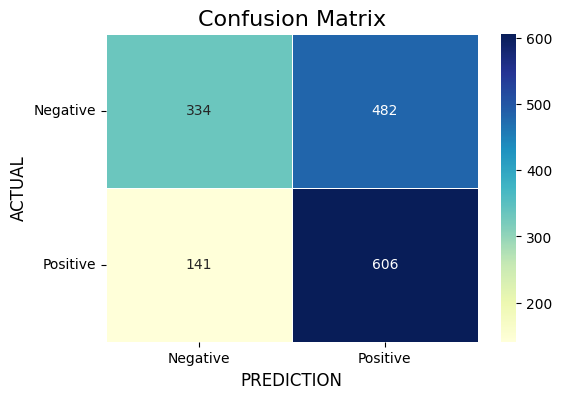

In [70]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

def plot_confusion_matrix(y_test, y_pred, labels=['Negative', 'Positive']):
    # Compute confusion matrix
    conf_matrix = confusion_matrix(y_test, y_pred)
    
    # Plot confusion matrix
    f, ax = plt.subplots(figsize=(6, 4))
    sns.heatmap(conf_matrix, annot=True, fmt="d", linewidths=.5, ax=ax, cmap="YlGnBu")
    plt.title("Confusion Matrix", fontsize=16)
    ax.set_xticklabels(labels)
    ax.set_yticklabels(labels, fontsize=10, rotation=360)
    plt.xlabel('PREDICTION', fontsize=12)
    plt.ylabel('ACTUAL', fontsize=12)
    plt.show()

# Example usage:
plot_confusion_matrix(y_test, y_pred)


In [71]:
print(classification_report(y_test,y_pred))

              precision    recall  f1-score   support

           0       0.70      0.41      0.52       816
           1       0.56      0.81      0.66       747

    accuracy                           0.60      1563
   macro avg       0.63      0.61      0.59      1563
weighted avg       0.63      0.60      0.59      1563



With the threshold adjustment, the model can predict better with a threshold of 35%. This means that if the prediction probability is above 35%, the value will be predicted as positive (making a deposit).

After adjusting features, hyperparameter tuning, and threshold, the model's f1 score is 0.66, indicating that the model has a good balance between precision and recall, where the model can accurately predict about 66% of the positive class (customers making a deposit), while minimizing the number of false negatives.

The model has a recall value of 0.81, indicating that out of all actual positive cases (customers making a deposit), the model can correctly classify about 81% of them as positive, while the rest are misclassified as negative (false negative).

### Feature Evaluation

In [72]:
# Get the best estimator from GridSearchCV
best_estimator = new_best_estimator

# Get the SelectKBest transformer
select_k_best = best_estimator.named_steps['feature_selection']

# Get the selected features indices
selected_indices = select_k_best.get_support(indices=True)


# Get the transformer from the best estimator
transformer = best_estimator.named_steps['preprocessor']

# Get the feature names after transformation
feature_names = transformer.get_feature_names_out(input_features=X_train.columns)

# Transform X_train using the transformer
X_test_encoded = transformer.transform(X_test)
X_test_encoded = pd.DataFrame(X_test_encoded, columns=feature_names)


# Get the column names of the selected features
selected_features = X_test_encoded.columns[selected_indices]
selected_features

Index(['num__pdays', 'num__campaign', 'cat__job_blue-collar',
       'cat__job_retired', 'cat__job_services', 'cat__job_student',
       'cat__housing_no', 'cat__housing_yes', 'cat__loan_no', 'cat__loan_yes',
       'cat__poutcome_failure', 'cat__poutcome_other', 'cat__poutcome_success',
       'cat__poutcome_unknown', 'remainder__balance'],
      dtype='object')

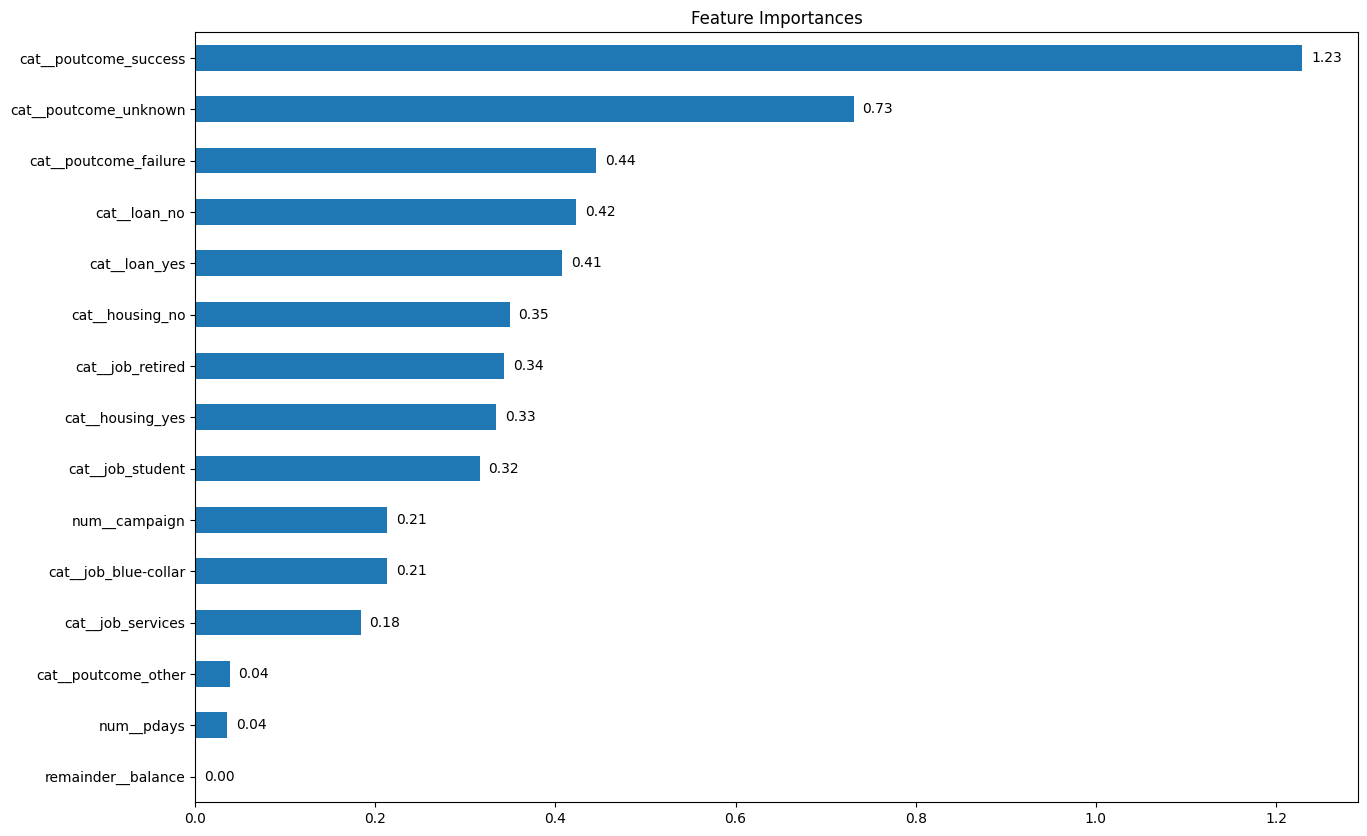

In [73]:
import matplotlib.pyplot as plt
import pandas as pd

# Get the best estimator from GridSearchCV
best_estimator = new_best_estimator

# Access the final estimator in the pipeline
final_estimator = best_estimator.named_steps['classifier']

# Get the coefficients from the final estimator
coefficients = final_estimator.coef_[0]

# Create a Series with coefficients and sort it
model_coef = pd.Series(coefficients, index=selected_features).abs().sort_values()

# Plot the feature importances
plt.figure(figsize=(15, 10))
ax = model_coef.plot(kind='barh', title='Feature Importances')

# Add annotations to the plot
for i in ax.patches:
    ax.text(i.get_width() + 0.01, i.get_y() + i.get_height() / 2,
            f'{i.get_width():.2f}', 
            ha='left', va='center')

plt.show()


1. The best model is the Logistic Regression model with a threshold of 35%. We chose the Logistic Regression model because it has a high F1 score and a lower standard deviation. This means that the Logistic Regression model is more consistent in making predictions during the training phase.

2. The features that most influence the model and are most significant are:

- The success of previous campaigns for each customer (Poutcome == Success/failure)
- Ownership of loans by the customer (loan)
- Ownership of housing loans by the customer (housing)
- The type of job of the customer (job == student/retired)
- The frequency of marketing contact with the customer (campaign)
- The last time the customer was contacted by Beast Bank to offer a product (pdays)
- The amount of balance in the customer's account (balance)

Additionally, there is a tendency for potential customers who have never been contacted before to influence the model (Poutcome == Unknown).

To see how these features are clearly related, we will further analyze the relationship between the features and the label on the train data.

In [74]:
train["contact"].isnull().sum()

1324

In [75]:
#Impute NaN values in the contact feature with the mode because the number of NaN values is below 50%

train["contact"].fillna(train["contact"].mode()[0],inplace=True)
train["job"].fillna(train["job"].mode()[0],inplace=True)
train.isna().sum()/len(train)

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
bin_age     0.0
dtype: float64

In [76]:
#Impute NaN values in the contact feature with the mode because the number of NaN values is below 50%
test["contact"].fillna(test["contact"].mode()[0],inplace=True)
test["job"].fillna(test["job"].mode()[0],inplace=True)
test.isna().sum()/len(test)

age         0.0
job         0.0
balance     0.0
housing     0.0
loan        0.0
contact     0.0
month       0.0
campaign    0.0
pdays       0.0
poutcome    0.0
deposit     0.0
bin_age     0.0
dtype: float64

In [77]:
group_bin_age = train.groupby("bin_age")["deposit"].value_counts(normalize=True).reset_index()
group_bin_age = group_bin_age[group_bin_age["deposit"]==1].drop("deposit",axis=1)
display(group_bin_age)


group_poutcome = train.groupby("poutcome")["deposit"].value_counts(normalize=True).reset_index()
group_poutcome = group_poutcome[group_poutcome["deposit"]==1].drop("deposit",axis=1)
display(group_poutcome)

group_job = train.groupby("job")["deposit"].value_counts(normalize=True).reset_index()
group_job = group_job[group_job["deposit"]==1].drop("deposit",axis=1)
display(group_job)

group_month = train.groupby("month")["deposit"].value_counts(normalize=True).reset_index()
group_month = group_month[group_month["deposit"]==1].drop("deposit",axis=1)
display(group_month)

group_contact = train.groupby("contact")["deposit"].value_counts(normalize=True).reset_index()
group_contact = group_contact[group_contact["deposit"]==1].drop("deposit",axis=1)
display(group_contact)

group_housing = train.groupby("housing")["deposit"].value_counts(normalize=True).reset_index()
group_housing = group_housing[group_housing["deposit"]==1].drop("deposit",axis=1)
display(group_housing)

group_loan = train.groupby("loan")["deposit"].value_counts(normalize=True).reset_index()
group_loan = group_loan[group_loan["deposit"]==1].drop("deposit",axis=1)
display(group_loan)

/var/folders/st/gw4jj341603__cgq15n27q4h0000gn/T/ipykernel_18368/2245757142.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  group_bin_age = train.groupby("bin_age")["deposit"].value_counts(normalize=True).reset_index()


,bin_age,proportion
0,<25 tahun,0.699219
3,25 - 40 tahun,0.463083
5,41 - 60 tahun,0.423686
6,>60 tahun,0.827586


,poutcome,proportion
0,failure,0.537010
2,other,0.615132
4,success,0.915541
7,unknown,0.404598


,job,proportion
1,admin,0.477573
3,blue-collar,0.380445
5,entrepreneur,0.377660
7,housemaid,0.370629
8,management,0.511864
10,retired,0.665893
13,self-employed,0.460870
15,services,0.391544
16,student,0.755000
19,technician,0.463462


,month,proportion
0,apr,0.636190
3,aug,0.468966
4,dec,0.923077
6,feb,0.572115
9,jan,0.437158
11,jul,0.401442
13,jun,0.441894
14,mar,0.899371
17,may,0.332075
19,nov,0.432692


,contact,proportion
1,cellular,0.475870
2,telephone,0.505721


,housing,proportion
0,no,0.577704
3,yes,0.365895


,loan,proportion
0,no,0.501108
3,yes,0.326061


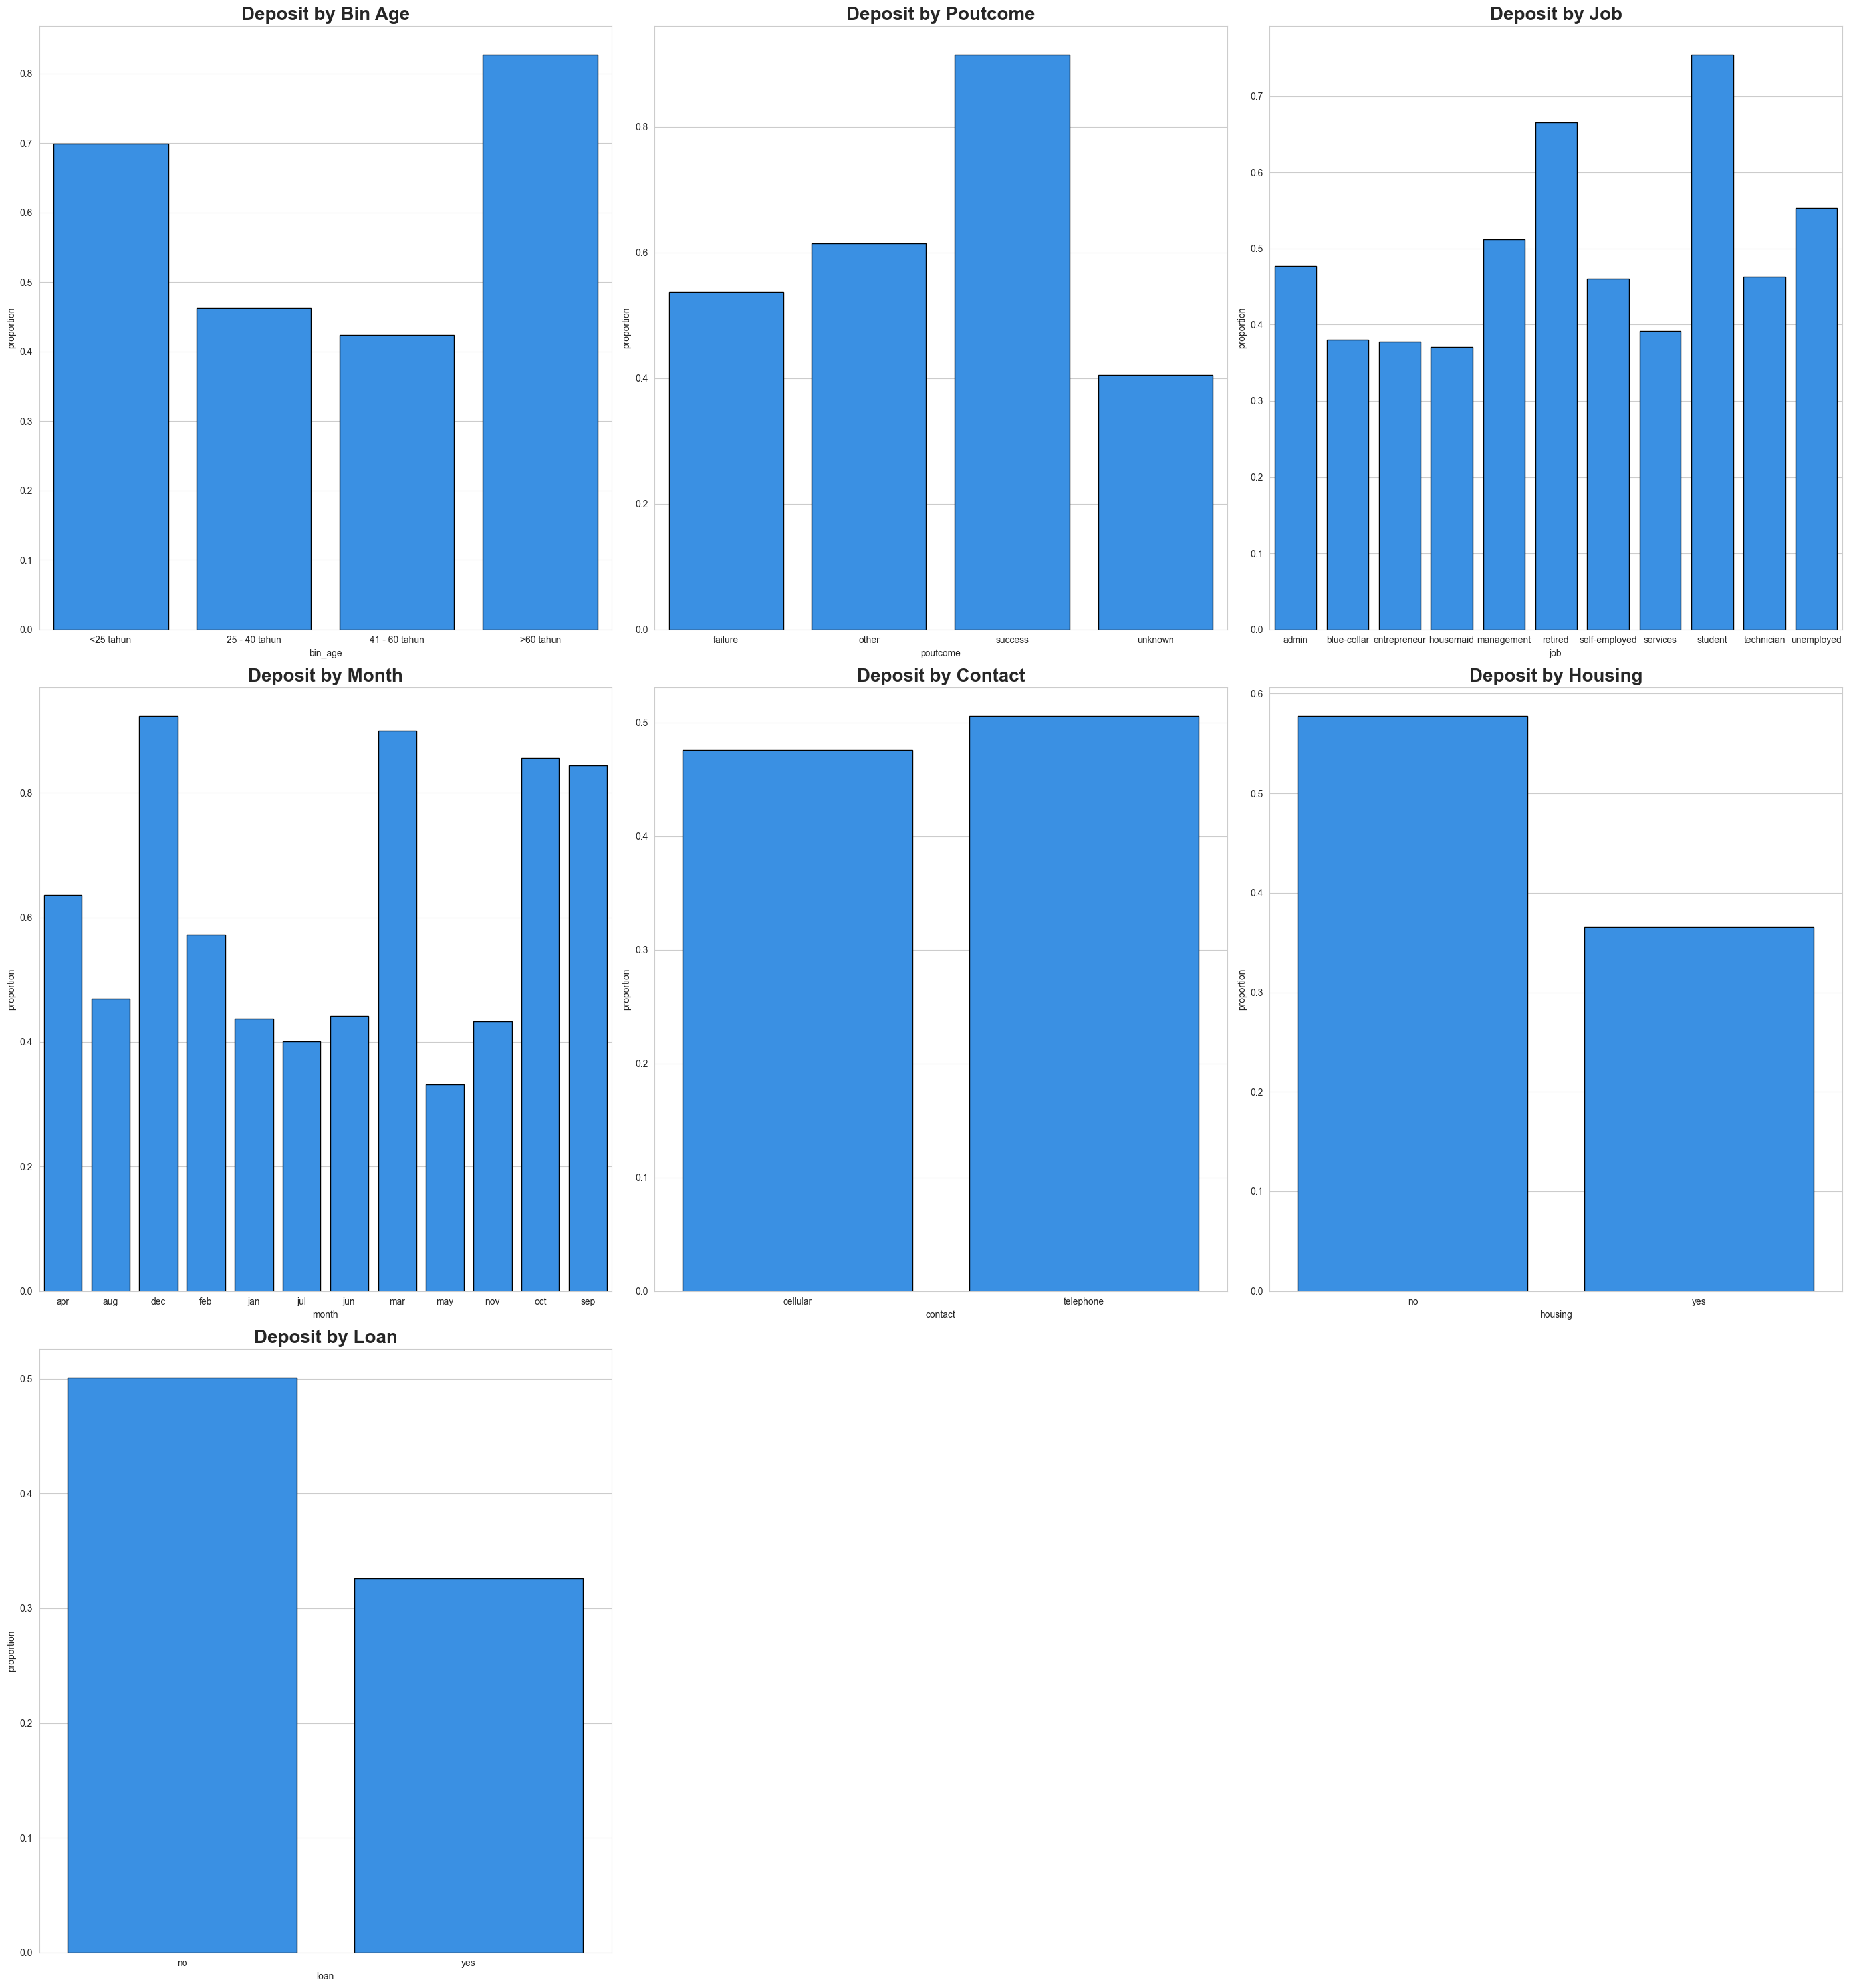

In [78]:
import matplotlib.pyplot as plt
import seaborn as sns

# Set the overall style
sns.set_style("whitegrid")
sns.set_palette("bright")  # Using a bright color palette for vibrancy

# Define a custom color for the bars
bar_color = 'dodgerblue'
edge_color = 'black'

# Plot the bar plots
plt.figure(figsize=(28, 30))

plt.subplot(3, 3, 1)
plt.title("Deposit by Bin Age", fontsize=20, fontweight='bold')
sns.barplot(data=group_bin_age, x="bin_age", y="proportion", color=bar_color, edgecolor=edge_color)

plt.subplot(3, 3, 2)
plt.title("Deposit by Poutcome", fontsize=20, fontweight='bold')
sns.barplot(data=group_poutcome, x="poutcome", y="proportion", color=bar_color, edgecolor=edge_color)

plt.subplot(3, 3, 3)
plt.title("Deposit by Job", fontsize=20, fontweight='bold')
sns.barplot(data=group_job, x="job", y="proportion", color=bar_color, edgecolor=edge_color)

plt.subplot(3, 3, 4)
plt.title("Deposit by Month", fontsize=20, fontweight='bold')
sns.barplot(data=group_month, x="month", y="proportion", color=bar_color, edgecolor=edge_color)

plt.subplot(3, 3, 5)
plt.title("Deposit by Contact", fontsize=20, fontweight='bold')
sns.barplot(data=group_contact, x="contact", y="proportion", color=bar_color, edgecolor=edge_color)

plt.subplot(3, 3, 6)
plt.title("Deposit by Housing", fontsize=20, fontweight='bold')
sns.barplot(data=group_housing, x="housing", y="proportion", color=bar_color, edgecolor=edge_color)

plt.subplot(3, 3, 7)
plt.title("Deposit by Loan", fontsize=20, fontweight='bold')
sns.barplot(data=group_loan, x="loan", y="proportion", color=bar_color, edgecolor=edge_color)

plt.tight_layout()
plt.show()



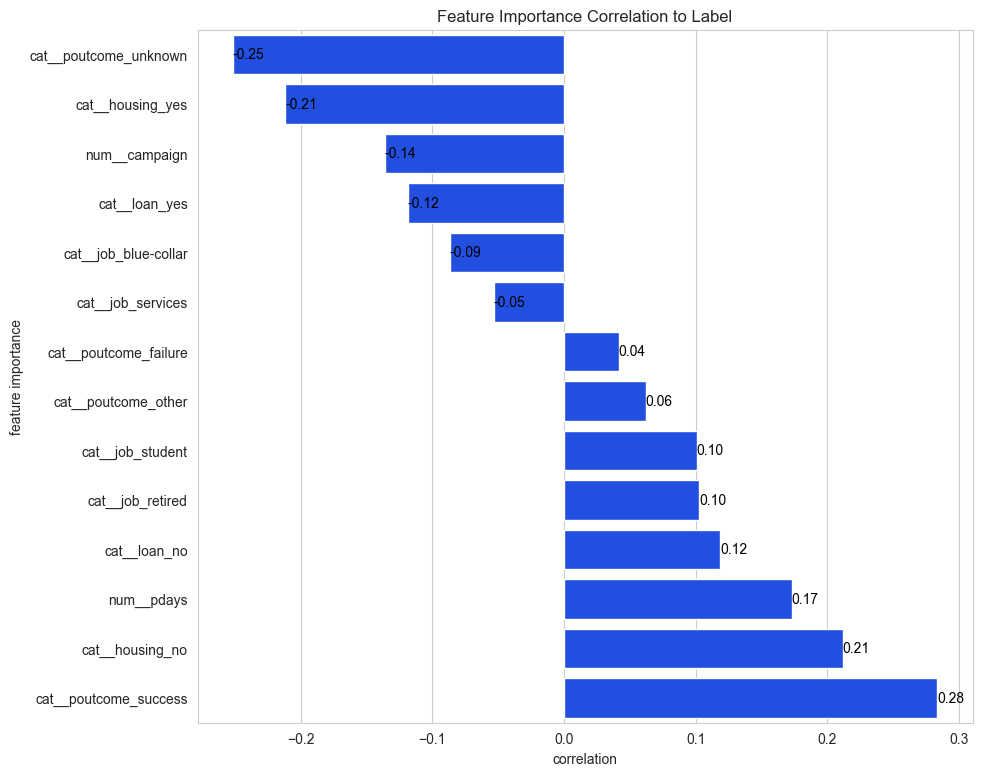

In [79]:
score = []
for i in X_train_encoded.columns:
    correlation = X_train_encoded[i].corr(y_train)
    score.append(correlation)

result = pd.DataFrame({
    "feature importance":X_train_encoded.columns,
    "correlation":score
}).sort_values("correlation")

result=result[result['feature importance'].isin(selected_features)]

plt.figure(figsize=(10,9))
plt.title("Feature Importance Correlation to Label")
sns.barplot(result, y="feature importance", x="correlation")

for index, value in enumerate(result["correlation"]):
    plt.text(value, index, f'{value:.2f}', color='black', ha="left", va="center")
    
plt.show()

Insights:

1. The success of previous marketing campaigns can positively impact the tendency of customers to make deposits in the next campaign.
2. Customers who do not have a mortgage are more likely to make deposits.
3. Customers who have not been contacted for a long time since the last campaign are more likely to make deposits.
4. Customers who do not have personal loans are more likely to make deposits.
5. If the customer is a student or retired, they are more likely to make deposits.
6. Potential customers who have not been contacted before are less likely to make deposits.
7. The more frequently the customer is contacted, the less likely they are to make deposits.

Now we know which features influence the model and their impact on the model's probability of predicting deposits or not.

## Business Outcome Evaluation 

The cost per lead (CPL) when calling prospect customers varies significantly by industry. Here are some industry-specific estimates:

- **Financial Services**: The average CPL ranges from $50 to $300. This wide range reflects the different types of financial products and services being marketed, as well as the varied target audiences within this sector​ ([Belkins - B2B Lead Generation Agency](https://belkins.io/blog/b2b-cost-per-lead))​​ ([Ippei Business](https://ippei.com/average-cost-per-lead-by-industry/))​.

- **Healthcare**: The cost per lead in the healthcare industry can range from $35 to $200. This variation depends on the specific niche within healthcare, such as medical services, pharmaceuticals, or health insurance​ ([ZeroIn](https://zeroin.me/blog/how-much-do-sales-leads-cost/))​​ ([Ippei Business](https://ippei.com/average-cost-per-lead-by-industry/))​.

- **Real Estate**: For the real estate sector, the average CPL is between $20 and $100. This can be influenced by the market conditions and the type of real estate being promoted, such as residential, commercial, or luxury properties​ ([Belkins - B2B Lead Generation Agency](https://belkins.io/blog/b2b-cost-per-lead))​​ ([Ippei Business](https://ippei.com/average-cost-per-lead-by-industry/))​.

- **Retail and E-commerce**: The cost per lead for retail and e-commerce businesses typically falls between $10 and $50. This is generally lower due to the higher volume of potential leads and the broad target market in this industry​ ([ZeroIn](https://zeroin.me/blog/how-much-do-sales-leads-cost/))​​ ([Ippei Business](https://ippei.com/average-cost-per-lead-by-industry/))​.



Using the information above, we assume the marketing cost incurred by the company for each prospective customer is $50 per person.

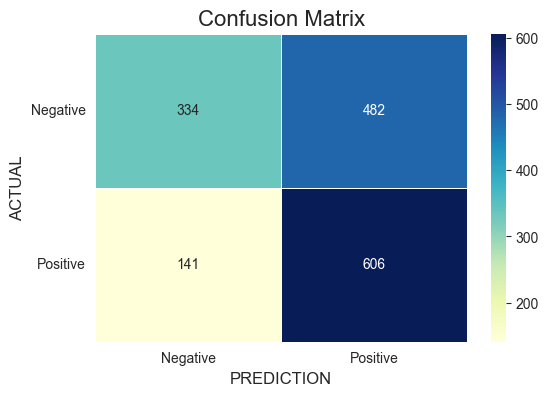

              precision    recall  f1-score   support

           0       0.70      0.41      0.52       816
           1       0.56      0.81      0.66       747

    accuracy                           0.60      1563
   macro avg       0.63      0.61      0.59      1563
weighted avg       0.63      0.60      0.59      1563



In [80]:
plot_confusion_matrix(y_test, y_pred)

print(classification_report(y_test,y_pred))


Before conducting a business evaluation using confusion matrix and classification report provided, we'll follow these steps:

1. Understand the Confusion Matrix and Classification Report:

   - True Positives (TP): 606 (Predicted Positive and actual Positive)
   - True Negatives (TN): 334 (Predicted Negative and actual Negative)
   - False Positives (FP): 482 (Predicted Positive but actual Negative)
   - False Negatives (FN): 141 (Predicted Negative but actual Positive)

   The classification report shows:

   - Precision, Recall, F1–Score for each class (0 and 1)
   - Overall Accuracy: 0.60 (60%)
   </br>
   </br>
   </br>


2. Understand the Evaluation Metric. Given that our positive class is customers who deposit:

   - Recall if it’s more important to identify as many depositing customers as possible, even if it means some non-depositing customers are incorrectly classified as depositing. Our model's recall for class 1 is 0.81, which means it’s good at identifying depositing customers.

   - Precision if we want to ensure that when our model predicts a customer will deposit, it’s likely correct. Our model's precision for class 1 is 0.56, which is relatively lower, indicating more false positives.

   - F1-score if we need a balance between identifying depositing customers and having a reasonable number of false positives. Our model's F1-score for class 1 is 0.66, providing a balance between precision and recall.
  </br>
   </br>
   </br>


3. Cost per Lead (CPL) Assumption:

   - Using an average CPL of $50 as mentioned earlier.
     </br>
   </br>

4. Financial Impact Calculation:
   - Calculate costs associated with False Positives (FP).
   - Calculate savings associated with True Positives (TP).


> ### Importance of F1 Score

The F1 score is the harmonic mean of precision and recall, providing a single metric that balances both. It is especially useful when dealing with imbalanced datasets, where one class may be more frequent than the other. In this case, focusing on the F1 score helps ensure that both false positives and false negatives are minimized, which is critical for the business context of predicting depositors.

> ### Cost and Savings Calculation

1. **Without Model:**

   - Assume contacting all customers (1563 in total).
   - Total cost = 1563 * $50 = $78,150
   - Depositors (positive class) = 747
   - Profit without model (assuming a profit of $X per depositor) = 747 * $X

2. **With Model:**

   - Model contacts predicted depositors and avoids non-depositors.
   - Predicted depositors = TP + FP = 606 + 482 = 1088
   - Total cost with model = 1088 * $50 = $54,400
   - Actual depositors contacted = TP = 606
   - Predicted non-depositors (True Negatives and False Negatives) not contacted = TN + FN = 334 + 141 = 475
   - Cost saved by not contacting predicted non-depositors = 475 * $50 = $23,750
   - Profit with model (assuming a profit of $X per depositor) = 606 * $X


> ### Comparison:

- **Cost Savings by Avoiding Non-Depositors:** $23,750

- **Overall Cost Savings:** $78,150 (without model) - $54,400 (with model) = $23,750

- **Depositors Reduction:** 747 (without model) - 606 (with model) = 141 fewer depositors

- **Profit Difference:** 606 * $X (with model) vs. 747 * $X (without model)

By using the model, the company avoids contacting 475 predicted non-depositors, which translates directly into a cost saving of $23,750. While this results in contacting fewer actual depositors, the precision of the model (F1 score of 0.66 for depositors) ensures that the focus is on high-potential customers, thus optimizing the marketing budget.The model helps avoid unnecessary expenses by correctly identifying and not contacting non-depositors. This approach balances cost savings and profit maximization, showcasing the value of employing machine learning models in business strategies.



## Model Constraints

We have determined that this model is the result of training on the train data, and the model can only perform well within a certain range. Below are the data constraints that the model can accept for prediction.

In [81]:
train.describe()

,age,balance,campaign,pdays,deposit
count,6239.000000,6239.000000,6239.000000,6239.000000,6239.000000
mean,41.182722,1483.274082,2.522199,51.733611,0.477961
std,11.909416,2809.774896,2.600980,108.867730,0.499554
min,18.000000,-3058.000000,1.000000,-1.000000,0.000000
25%,32.000000,132.500000,1.000000,-1.000000,0.000000
50%,39.000000,546.000000,2.000000,-1.000000,0.000000
75%,49.000000,1671.500000,3.000000,34.500000,1.000000
max,95.000000,37127.000000,33.000000,854.000000,1.000000


In [82]:
#Viewing unique values in the train data
pd.set_option('display.max_colwidth', None)

columns = ['job', 'housing', 'loan', 'contact', 'month','poutcome']
values = []
nunique_list = []
for i in columns:
    value = train[i].unique()
    nunique = train[i].nunique()
    nunique_list.append(nunique)
    values.append(value)

display(
    pd.DataFrame({
    "columns" : columns,
    "values" : values,
    "nunique": nunique_list
})
       )
pd.reset_option('display.max_colwidth')

,columns,values,nunique
0,job,"[admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed]",11
1,housing,"[no, yes]",2
2,loan,"[no, yes]",2
3,contact,"[cellular, telephone]",2
4,month,"[jun, apr, may, nov, jan, sep, feb, aug, jul, oct, mar, dec]",12
5,poutcome,"[unknown, other, failure, success]",4


The model can only perform well if the data being tested meets the following criteria:

| Criteria  | Value Range                      | Allowed Values                                                                                                  |
|-----------|--------------------------------------|-----------------------------------------------------------------------------------------------------------------------------|
| Age      | 18 - 95                              | -                                                                                                                           |
| Balance   | (-3058) - 37127                        | -                                                                                                                           |
| Campaign  | 1 - 33                               | -                                                                                                                           |
| Pdays     | (-1) - 854                             | -                                                                                                                           |
| Job       | -                                    | admin, self-employed, services, housemaid, technician, management, student, blue-collar, entrepreneur, retired, unemployed |
| Housing   | -                                    | no, yes                                                                                                                     |
| Loan      | -                                    | no, yes                                                                                                                     |
| Contact   | -                                    | cellular, telephone                                                                                                         |
| Month     | -                                    | jan, feb, mar, apr, may, jun, jul, aug, sep, oct, nov, dec                                                                  |
| Poutcome  | -                                    | unknown, other, failure, success                                                                                            |


# <span style="color:#C71585"> 5. Conclusion & Recommendation </span>

![image_5.jpg](https://cdn.vectorstock.com/i/500p/66/69/red-color-inserted-label-with-word-conclusion-vector-43796669.jpg)

### CONCLUSION


1. In our model benchmarking, we use the F1 score as the evaluation metric for model selection. The company's loss from False Negatives (when a customer is interested in a Term Deposit but we predict they are not interested) is the loss of potential customers who end up opening a Term Deposit at another bank (competitor). The company's loss from False Positives (when a customer is not interested in a Term Deposit but we predict they are interested) is the loss of marketing costs spent contacting potential customers who do not convert into new customer who opening a Term Deposit. Therefore, we use the F1 score as the harmonic mean of recall and precision to select the algorithm model.

2. The Logistic Regression model with hyperparameter tuning and threshold adjustment has better performance in predicting the likelihood of customers making deposits using only 15 features after the preprocessing stage compared to the conventional approach.

3. Our model's prediction results successfully achieved 66% of genuinely interested customers from the total number of interested customers opening a Term Deposit, and successfully reduced marketing costs by not offering the Term Deposit product to 81% of uninterested customers.

4. The wasted marketing cost is the cost given to 19% of customers predicted to be interested but actually not interested (from the recall value of class 0).

### RECOMMENDATION

**Business Recommendation**

The Logistic Regression classification model that has been developed can be an effective tool for Beast Bank's business development team to predict which prospective customers are most likely to make a deposit at the bank. By using this model as a guide, the team is expected to allocate their time and resources more efficiently to prospective customers with higher potential. For example, they can more frequently contact prospective customers with a higher likelihood of making deposits, schedule more appointments with the right prospective customers, and provide promotions that better match the needs of potential customers.

Based on the chosen random forest model, several feature factors that most influence the model's ability to predict customer tendencies to make deposits in the next marketing campaign have been identified:

1. The success of previous marketing campaigns has a positive impact on the likelihood of customers making deposits in the next campaign.
2. Prospective customers who do not have home loans tend to be more likely to make deposits.
3. Customers who have not been contacted for a long time since the last campaign are more likely to make deposits.
4. Customers without personal loans are more likely to make deposits.
5. If the prospective customer is a student or retired, they are more likely to make deposits.
6. Prospective customers who have never been contacted are less likely to make deposits.
7. The more frequently the customer is contacted, the less likely they are to make deposits.

**Model Improvement Recommendation**

Marketing data is crucial for improving model performance. Therefore, for the next marketing campaign, the business development team is advised to enter data in more detail into the system. For example, recording the campaign results as successful or failed without including any other values. This way, the model can learn more effectively from the existing data, which in turn will improve the accuracy of predicting the likelihood of prospective customers making deposits at Beast Bank.

In addition, it is recommended to test other models that have not been tested in this documentation, such as the adaboost model or catboost model. The goal is to find other types of models that are more effective in improving the F1 score.



### Fit Final Model & Saving

In [83]:
#Concat train and test features data
data_final_model_X = pd.concat([X_train,X_test])
data_final_model_X

,age,job,balance,housing,loan,contact,month,campaign,pdays,poutcome
0,55,admin,1662,no,no,cellular,jun,2,-1,unknown
1,39,self-employed,-3058,yes,yes,cellular,apr,3,-1,unknown
2,51,admin,3025,no,no,cellular,may,1,352,other
3,38,services,-87,yes,no,cellular,may,1,-1,unknown
4,36,housemaid,205,yes,no,telephone,nov,4,-1,unknown
...,...,...,...,...,...,...,...,...,...,...
1558,55,admin,602,no,no,cellular,jun,3,90,success
1559,26,blue-collar,78,no,no,telephone,jan,1,-1,unknown
1560,72,retired,1129,no,no,cellular,aug,1,-1,unknown
1561,52,admin,423,yes,yes,cellular,oct,2,96,failure


In [84]:
#Concat train and test label data
data_final_model_y = pd.concat([y_train,y_test])
data_final_model_y

0       1
1       1
2       1
3       0
4       0
       ..
1558    1
1559    0
1560    1
1561    0
1562    1
Name: deposit, Length: 7802, dtype: int64

In [85]:
# Get the best estimator from GridSearchCV
best_estimator = new_best_estimator

#Fit model ke fitur data train dan test yang sudah disatukan dan label data train dan test yang telah disatukan
best_estimator.fit(data_final_model_X,data_final_model_y)

/opt/anaconda3/lib/python3.11/site-packages/sklearn/linear_model/_logistic.py:458: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


Pipeline(steps=[('preprocessor',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('num',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='median')),
                                                                  ('scaler',
                                                                   RobustScaler())]),
                                                  ['pdays', 'campaign', 'age']),
                                                 ('cat',
                                                  Pipeline(steps=[('imputer',
                                                                   SimpleImputer(strategy='most_frequent')),
                                                                  ('onehot',
                                                                   OneHotEncoder(handle_unknown='ignore'))]),
                                                  ['job', 'housing', 'loan',
                                                   'contact', 'poutcome']),
                                                 ('month_encoder',
                                                  MonthLabelEncoder(),
                                                  ['month'])])),
                ('feature_selection', SelectKBest(k=15)),
                ('classifier', LogisticRegression(random_state=2020))])

In [86]:
import pickle

In [87]:
#Saving models

filename = 'Model Final Kia 2.sav'

# Uncomment code below to save file model

pickle.dump(best_estimator,open(filename,'wb'))

In [88]:
# # Uncomment code below to run the file model

# model = pickle.load(open('/Users/hizkiasimaremare/Documents/PURWADHIKA/CAPSTONE 3/Model Final Kia.sav', 'rb'))
# model.predict(X_test)